# 資料探勘期末專案 - 顧客流失分析與預測
#### 資料集：customer_churn.csv (target：churn 欄位)

## 動機
* 顧客流失會導致收益減少，可能對商家的經營帶來負面影響。這次期末專案我們希望透過分析顧客歷史消費資料，查看屬性與是否流失之間的關係，並透過訓練與調整模型，找出影響顧客流失的關鍵屬性，我們將會使用多種模型預測是否流失，並藉由重新挑選特徵與調整模型來優化預測結果準確率。

## 實作方法與流程
* 使用模型：scikit-learn 的 Naive-Bayes、Logistic Regression、Decision Tree、Random Forest、XGBoost、MLP、SVM模型、keras 的CNN模型
* 評估方法：分別計算個模型的Accuracy、Precision、Recall、F1-score值，繪製confusion matrix和ROC曲線
* 流程說明：匯入資料 → 資料前處理（刪除重複的instance、填補空值、類別屬性做encoding）、分析資料集（查看屬性間的相關性、EDA）→ 切分訓練集與測試集 → 建構及訓練模型（調整模型&重新挑選特徵）→ 評估分析結果

## 一、讀取資料集並查看

In [464]:
import numpy as np
import pandas as pd
import warnings
pd.options.mode.chained_assignment = None

df = pd.read_csv('customer_churn.csv')
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,54023,1,1.0,Computer,1,31.0,Debit Card,Male,4.0,5,Mobile Phone,1,Single,3,1,25.0,2.0,2.0,1.0,149
1,50266,0,16.0,Mobile Phone,1,18.0,Debit Card,Male,2.0,4,Grocery,4,Married,2,0,11.0,0.0,NaN,9.0,243
2,54985,0,16.0,Mobile Phone,1,36.0,Credit Card,Male,3.0,6,Laptop & Accessory,1,Single,6,0,20.0,2.0,2.0,1.0,168
3,52029,1,0.0,Phone,3,NaN,E wallet,Male,2.0,4,Mobile,4,Married,2,1,18.0,0.0,1.0,0.0,124
4,50084,0,13.0,Computer,1,15.0,Debit Card,Male,3.0,4,Laptop & Accessory,2,Divorced,10,0,14.0,1.0,1.0,2.0,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3078,51224,0,13.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,3,Grocery,5,Married,3,0,11.0,NaN,11.0,16.0,268
3079,51396,1,11.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,Fashion,3,Single,10,1,13.0,0.0,1.0,0.0,154
3080,52017,0,NaN,Mobile Phone,1,16.0,Debit Card,Male,2.0,3,Mobile,4,Married,2,0,14.0,1.0,1.0,0.0,120
3081,50355,1,0.0,Computer,1,13.0,Debit Card,Female,NaN,3,Mobile,3,Divorced,2,1,16.0,0.0,1.0,2.0,129


In [465]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3083 entries, 0 to 3082
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   3083 non-null   int64  
 1   Churn                        3083 non-null   int64  
 2   Tenure                       2930 non-null   float64
 3   PreferredLoginDevice         3083 non-null   object 
 4   CityTier                     3083 non-null   int64  
 5   WarehouseToHome              2929 non-null   float64
 6   PreferredPaymentMode         3083 non-null   object 
 7   Gender                       3083 non-null   object 
 8   HourSpendOnApp               2933 non-null   float64
 9   NumberOfDeviceRegistered     3083 non-null   int64  
 10  PreferedOrderCat             3083 non-null   object 
 11  SatisfactionScore            3083 non-null   int64  
 12  MaritalStatus                3083 non-null   object 
 13  NumberOfAddress   

In [466]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,3083.000000,3083.000000,2930.000000,3083.000000,2929.000000,2933.000000,3083.000000,3083.000000,3083.000000,3083.000000,2952.000000,2957.000000,2955.000000,2917.000000,3083.000000
mean,52807.293870,0.308466,9.108532,1.681803,15.770570,2.945789,3.750243,3.134285,4.334739,0.327927,15.713753,1.753466,2.993570,4.349332,174.903990
std,1617.129719,0.461935,8.548967,0.925318,8.557181,0.719154,1.005128,1.382237,2.663020,0.469534,3.764821,1.886251,2.948375,3.609403,47.829311
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51396.500000,0.000000,1.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.000000
50%,52832.000000,0.000000,7.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,161.000000
75%,54187.500000,1.000000,14.750000,3.000000,21.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,192.500000
max,55628.000000,1.000000,61.000000,3.000000,126.000000,5.000000,6.000000,5.000000,21.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.000000


## 二、刪除資料集中重複資料，僅保留一筆並列出剩餘資料筆數

In [467]:
#刪除重覆多餘的資料 (僅保留第一筆)
df = df.drop_duplicates(keep='first', inplace=False)
#可用 df.groupby(['CustomerID']).size() 或 df.duplicated() 檢查是否有重複資料
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,54023,1,1.0,Computer,1,31.0,Debit Card,Male,4.0,5,Mobile Phone,1,Single,3,1,25.0,2.0,2.0,1.0,149
1,50266,0,16.0,Mobile Phone,1,18.0,Debit Card,Male,2.0,4,Grocery,4,Married,2,0,11.0,0.0,NaN,9.0,243
2,54985,0,16.0,Mobile Phone,1,36.0,Credit Card,Male,3.0,6,Laptop & Accessory,1,Single,6,0,20.0,2.0,2.0,1.0,168
3,52029,1,0.0,Phone,3,NaN,E wallet,Male,2.0,4,Mobile,4,Married,2,1,18.0,0.0,1.0,0.0,124
4,50084,0,13.0,Computer,1,15.0,Debit Card,Male,3.0,4,Laptop & Accessory,2,Divorced,10,0,14.0,1.0,1.0,2.0,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3078,51224,0,13.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,3,Grocery,5,Married,3,0,11.0,NaN,11.0,16.0,268
3079,51396,1,11.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,Fashion,3,Single,10,1,13.0,0.0,1.0,0.0,154
3080,52017,0,NaN,Mobile Phone,1,16.0,Debit Card,Male,2.0,3,Mobile,4,Married,2,0,14.0,1.0,1.0,0.0,120
3081,50355,1,0.0,Computer,1,13.0,Debit Card,Female,NaN,3,Mobile,3,Divorced,2,1,16.0,0.0,1.0,2.0,129


## 三、 填補空值

In [468]:
#每個欄位的空值個數
print('每個欄位的空值個數：')
print(df.isnull().sum())

每個欄位的空值個數：
CustomerID                       0
Churn                            0
Tenure                         153
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                154
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 150
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    131
CouponUsed                     126
OrderCount                     128
DaySinceLastOrder              166
CashbackAmount                   0
dtype: int64


In [469]:
#以平均數填補空值 ( Tenure、WarehouseToHome、HourSpendOnApp、OrderAmountHikeFromlastYear、CouponUsed、OrderCount、DaySinceLastOrder)
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].mean())
df['WarehouseToHome'] = df['WarehouseToHome'].fillna(df['WarehouseToHome'].mean())
df['HourSpendOnApp'] = df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].mean())
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].mean())

# 四捨五入取整數
df['CouponUsed'] = df['CouponUsed'].fillna(round(df['CouponUsed'].mean()))

# 用CouponUsed的平均值填，因為上月下訂單的次數 >= 上月用過優惠卷次數 
df['OrderCount'] = df['OrderCount'].fillna(round(df['CouponUsed'].mean()))

# 四捨五入取整數
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(round(df['DaySinceLastOrder'].mean()))

df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,54023,1,1.000000,Computer,1,31.000000,Debit Card,Male,4.000000,5,Mobile Phone,1,Single,3,1,25.0,2.0,2.0,1.0,149
1,50266,0,16.000000,Mobile Phone,1,18.000000,Debit Card,Male,2.000000,4,Grocery,4,Married,2,0,11.0,0.0,2.0,9.0,243
2,54985,0,16.000000,Mobile Phone,1,36.000000,Credit Card,Male,3.000000,6,Laptop & Accessory,1,Single,6,0,20.0,2.0,2.0,1.0,168
3,52029,1,0.000000,Phone,3,15.758208,E wallet,Male,2.000000,4,Mobile,4,Married,2,1,18.0,0.0,1.0,0.0,124
4,50084,0,13.000000,Computer,1,15.000000,Debit Card,Male,3.000000,4,Laptop & Accessory,2,Divorced,10,0,14.0,1.0,1.0,2.0,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3078,51224,0,13.000000,Mobile Phone,1,6.000000,Debit Card,Male,3.000000,3,Grocery,5,Married,3,0,11.0,2.0,11.0,16.0,268
3079,51396,1,11.000000,Mobile Phone,1,6.000000,Debit Card,Male,3.000000,4,Fashion,3,Single,10,1,13.0,0.0,1.0,0.0,154
3080,52017,0,9.115897,Mobile Phone,1,16.000000,Debit Card,Male,2.000000,3,Mobile,4,Married,2,0,14.0,1.0,1.0,0.0,120
3081,50355,1,0.000000,Computer,1,13.000000,Debit Card,Female,2.946721,3,Mobile,3,Divorced,2,1,16.0,0.0,1.0,2.0,129


## 四、查看屬性間的相關性

/tmp/ipykernel_3422409/4198342168.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


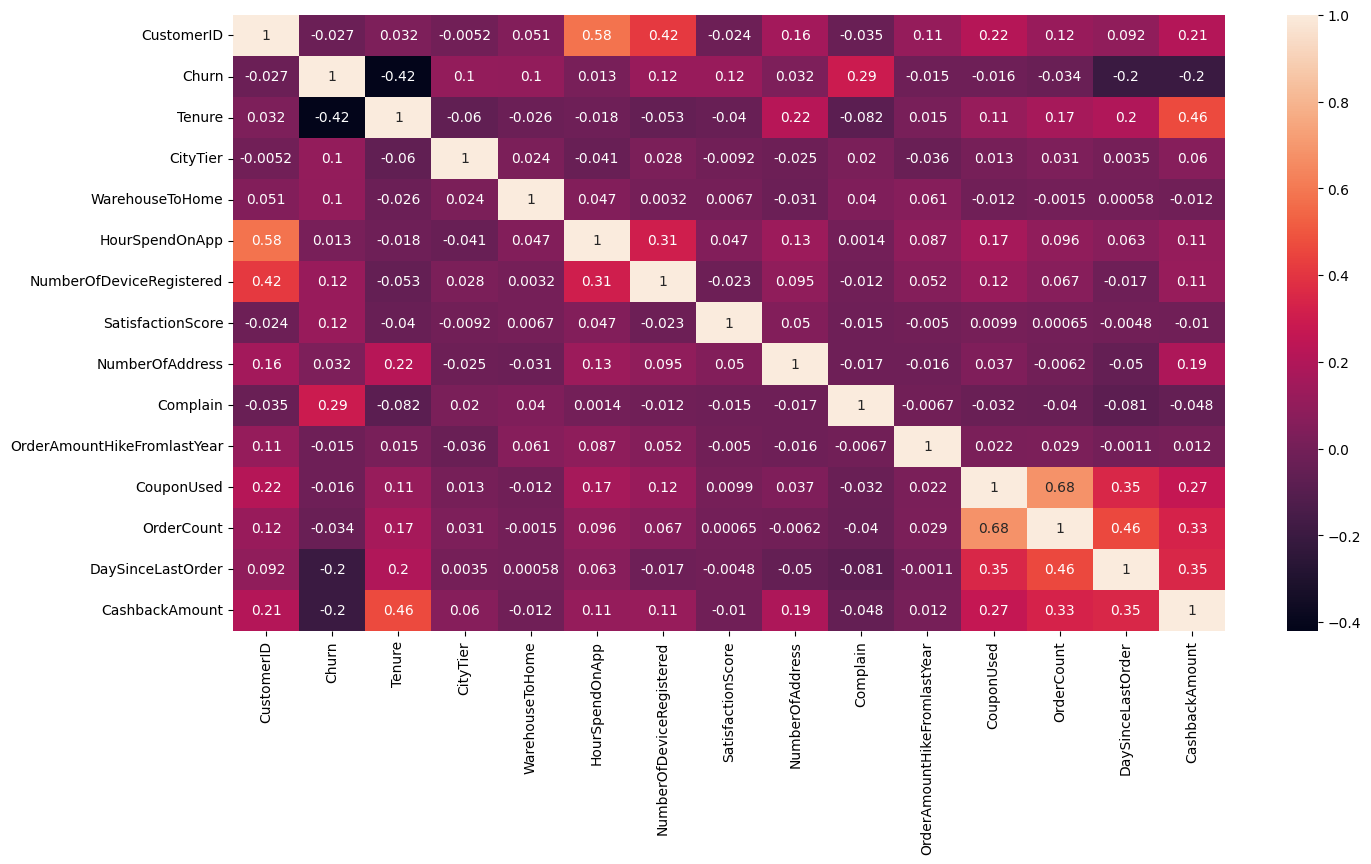

In [470]:
import matplotlib.pyplot as plt
import seaborn as sns

# Using Heatmap to visualize the Correlation.
cor = df.corr()
top_corr_fea = cor.index
plt.figure(figsize=(16,8))
sns.heatmap(df[top_corr_fea].corr(), annot=True)
plt.show()

In [471]:
cor

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,1.000000,-0.026877,0.031607,-0.005158,0.051072,0.578722,0.416670,-0.023850,0.156715,-0.035396,0.112156,0.216891,0.122828,0.091884,0.208316
Churn,-0.026877,1.000000,-0.419950,0.104360,0.100536,0.013465,0.121608,0.123277,0.031685,0.294616,-0.015446,-0.015905,-0.033690,-0.199048,-0.202828
Tenure,0.031607,-0.419950,1.000000,-0.060195,-0.026395,-0.017687,-0.052536,-0.039852,0.218848,-0.081886,0.015349,0.114151,0.165339,0.195795,0.463855
CityTier,-0.005158,0.104360,-0.060195,1.000000,0.023909,-0.041166,0.027585,-0.009178,-0.025017,0.020360,-0.035812,0.012665,0.031078,0.003527,0.059505
WarehouseToHome,0.051072,0.100536,-0.026395,0.023909,1.000000,0.047467,0.003211,0.006668,-0.031420,0.039627,0.060891,-0.011737,-0.001475,0.000581,-0.011671
HourSpendOnApp,0.578722,0.013465,-0.017687,-0.041166,0.047467,1.000000,0.312187,0.046720,0.130366,0.001395,0.087164,0.166081,0.095563,0.062756,0.110534
NumberOfDeviceRegistered,0.416670,0.121608,-0.052536,0.027585,0.003211,0.312187,1.000000,-0.022655,0.095489,-0.012206,0.051574,0.122804,0.067250,-0.016708,0.112581
SatisfactionScore,-0.023850,0.123277,-0.039852,-0.009178,0.006668,0.046720,-0.022655,1.000000,0.049881,-0.015167,-0.004987,0.009935,0.000650,-0.004811,-0.010437
NumberOfAddress,0.156715,0.031685,0.218848,-0.025017,-0.031420,0.130366,0.095489,0.049881,1.000000,-0.017301,-0.015966,0.036670,-0.006245,-0.049992,0.188626
Complain,-0.035396,0.294616,-0.081886,0.020360,0.039627,0.001395,-0.012206,-0.015167,-0.017301,1.000000,-0.006674,-0.032135,-0.040075,-0.080570,-0.048360


## 五、查看資料EDA

* CustomerID:識別顧客 (unique)
* Churn:是否為流失的顧客 (1:是、0:否)

###  1. 消費者的基本資訊
* Gender:顧客性別
* MaritalStatus:顧客的婚姻狀態
* CityTier:顧客居住的城市等級
* NumberOfAddress:顧客的地址數量
* WarehouseToHome:倉庫到顧客家的距離

### 不同性別對顧客流失的關係 - Gender

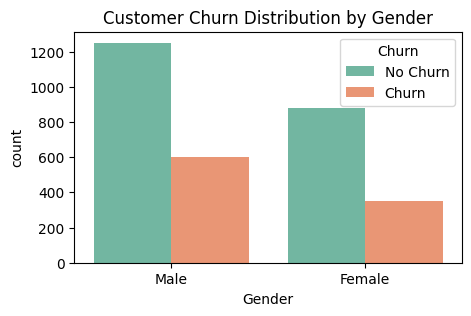

In [472]:
plt.subplots(figsize=(5,3))  # 設置長寬尺寸大小
ax = sns.countplot(x="Gender", hue="Churn", data=df, palette="Set2")
ax.set_title('Customer Churn Distribution by Gender')
plt.legend(title='Churn', labels=["No Churn","Churn"])  #修改圖例
plt.show()

In [473]:
cal = pd.DataFrame(df.groupby([df['Gender'],df['Churn']]).size())
cal2 = pd.DataFrame(df.groupby(df['Gender']).size())
ccc = pd.merge(cal, cal2, left_index=True, right_index=True)
ccc['percentage'] = ccc['0_x']/ccc['0_y']
ccc

0_x   0_y  percentage
Gender Churn                        
Female 0       880  1228    0.716612
       1       348  1228    0.283388
Male   0      1250  1850    0.675676
       1       600  1850    0.324324

### 不同婚姻狀態對顧客流失的關係 - MaritalStatus

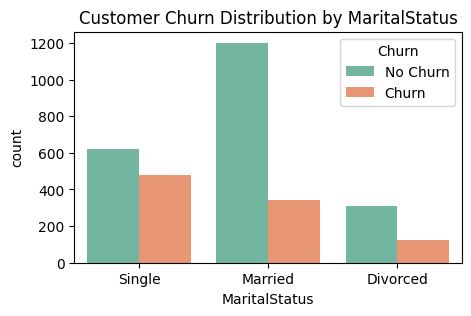

In [474]:
plt.subplots(figsize=(5,3))  # 設置長寬尺寸大小
ax = sns.countplot(x="MaritalStatus", hue="Churn", data=df, palette="Set2")
ax.set_title('Customer Churn Distribution by MaritalStatus')
plt.legend(title='Churn', labels=["No Churn","Churn"])  #修改圖例
plt.show()

In [475]:
cal = pd.DataFrame(df.groupby([df['MaritalStatus'],df['Churn']]).size())
cal2 = pd.DataFrame(df.groupby(df['MaritalStatus']).size())
ccc = pd.merge(cal, cal2, left_index=True, right_index=True)
ccc['percentage'] = ccc['0_x']/ccc['0_y']
ccc

0_x   0_y  percentage
MaritalStatus Churn                        
Divorced      0       309   433    0.713626
              1       124   433    0.286374
Married       0      1201  1545    0.777346
              1       344  1545    0.222654
Single        0       620  1100    0.563636
              1       480  1100    0.436364

### 不同居住城市等級對顧客流失的關係 - CityTier

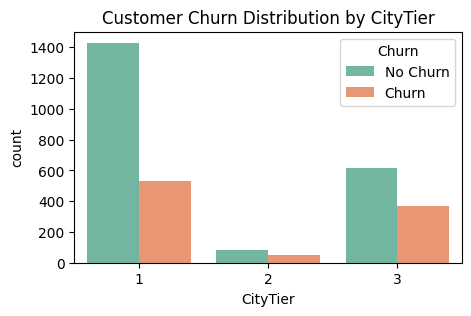

In [476]:
plt.subplots(figsize=(5,3))  # 設置長寬尺寸大小
ax = sns.countplot(x="CityTier", hue="Churn", data=df, palette="Set2")
ax.set_title('Customer Churn Distribution by CityTier')
plt.legend(title='Churn', labels=["No Churn","Churn"])  #修改圖例
plt.show()

In [477]:
cal = pd.DataFrame(df.groupby([df['CityTier'],df['Churn']]).size())
cal2 = pd.DataFrame(df.groupby(df['CityTier']).size())
ccc = pd.merge(cal, cal2, left_index=True, right_index=True)
ccc['percentage'] = ccc['0_x']/ccc['0_y']
ccc

0_x   0_y  percentage
CityTier Churn                        
1        0      1430  1962    0.728848
         1       532  1962    0.271152
2        0        84   132    0.636364
         1        48   132    0.363636
3        0       616   984    0.626016
         1       368   984    0.373984

### 顧客地址數量對顧客流失的關係 - NumberOfAddress

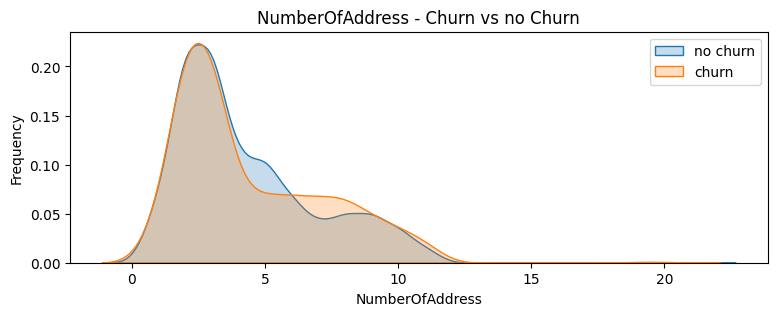

In [478]:
plt.subplots(figsize=(9,3))  # 設置長寬尺寸大小

ax = sns.kdeplot( df.loc[(df['Churn']==0),'NumberOfAddress'] , fill=True, label='no churn')
ax = sns.kdeplot( df.loc[(df['Churn']==1),'NumberOfAddress'] , fill=True, label='churn')
#ax = sns.kdeplot(df,hue='Churn')

plt.title('NumberOfAddress - Churn vs no Churn')
plt.xlabel("NumberOfAddress")
plt.ylabel("Frequency")
plt.legend()
plt.show()

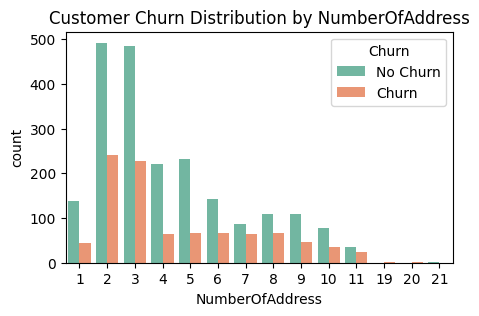

In [479]:
plt.subplots(figsize=(5,3))  # 設置長寬尺寸大小
ax = sns.countplot(x="NumberOfAddress", hue="Churn", data=df, palette="Set2")
ax.set_title('Customer Churn Distribution by NumberOfAddress')
plt.legend(title='Churn', labels=["No Churn","Churn"])  #修改圖例
plt.show()

In [480]:
cal = pd.DataFrame(df.groupby([df['NumberOfAddress'],df['Churn']]).size())
cal2 = pd.DataFrame(df.groupby(df['NumberOfAddress']).size())
ccc = pd.merge(cal, cal2, left_index=True, right_index=True)
ccc['percentage'] = ccc['0_x']/ccc['0_y']
ccc

0_x  0_y  percentage
NumberOfAddress Churn                      
1               0      139  184    0.755435
                1       45  184    0.244565
2               0      492  733    0.671214
                1      241  733    0.328786
3               0      485  713    0.680224
                1      228  713    0.319776
4               0      221  286    0.772727
                1       65  286    0.227273
5               0      232  299    0.775920
                1       67  299    0.224080
6               0      142  208    0.682692
                1       66  208    0.317308
7               0       86  150    0.573333
                1       64  150    0.426667
8               0      109  175    0.622857
                1       66  175    0.377143
9               0      110  156    0.705128
                1       46  156    0.294872
10              0       78  113    0.690265
                1       35  113    0.309735
11              0       35   58    0.603448
                1       23   58    0.396552
19              1        1    1    1.000000
20              1        1    1    1.000000
21              0        1    1    1.000000

### 倉庫到顧客家的距離對顧客流失的關係 - WarehouseToHome

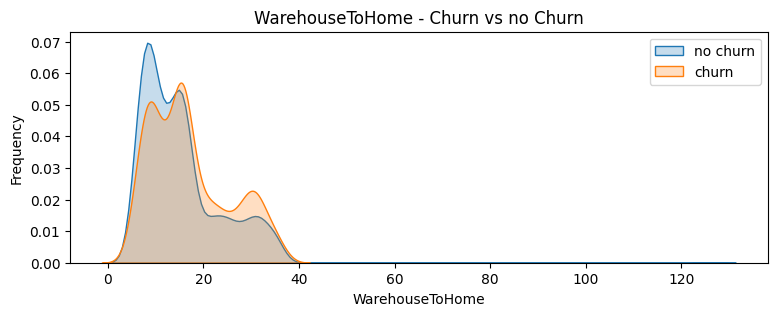

In [481]:
plt.subplots(figsize=(9,3))  # 設置長寬尺寸大小

ax = sns.kdeplot( df.loc[(df['Churn']==0),'WarehouseToHome'] , fill=True, label='no churn')
ax = sns.kdeplot( df.loc[(df['Churn']==1),'WarehouseToHome'] , fill=True, label='churn')

plt.title('WarehouseToHome - Churn vs no Churn')
plt.xlabel("WarehouseToHome")
plt.ylabel("Frequency")
plt.legend()
plt.show()

<AxesSubplot: xlabel='WarehouseToHome', ylabel='Density'>

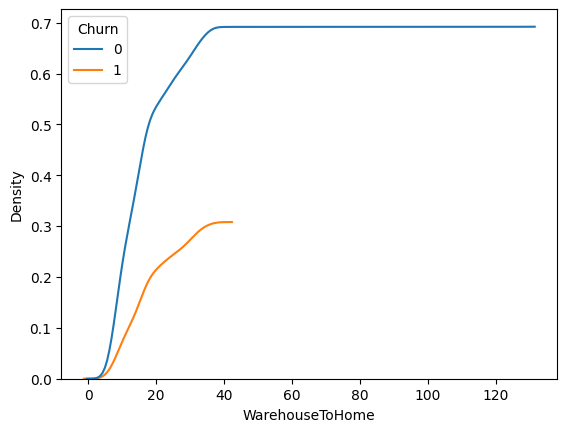

In [482]:
sns.kdeplot(data=df, x="WarehouseToHome", hue="Churn", cumulative=True) #占全部的比例
# sns.kdeplot(data=df, x="WarehouseToHome", hue="Churn", cumulative=False) #占全部的比例

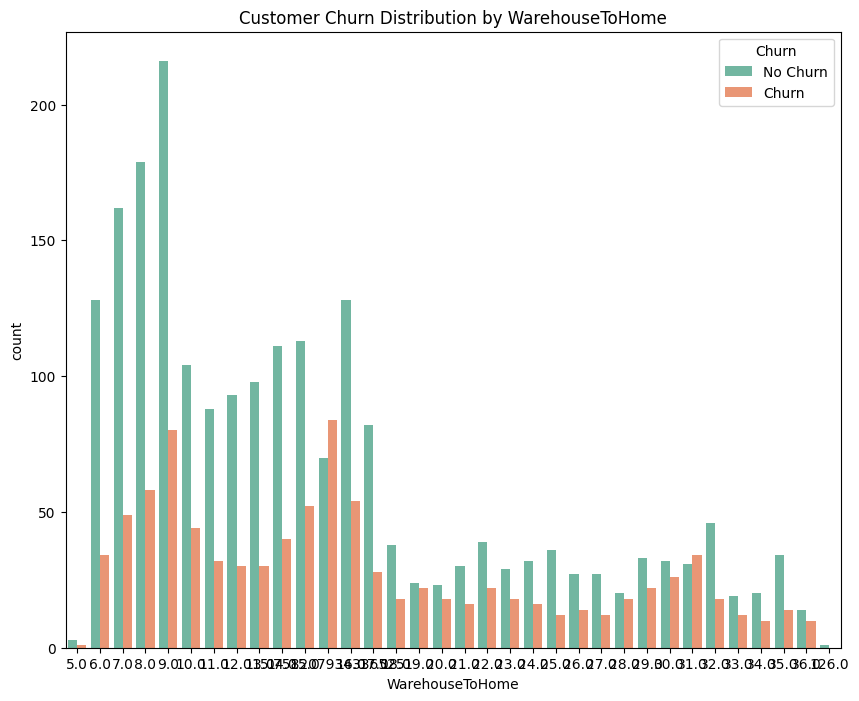

In [483]:
plt.subplots(figsize=(10,8))  # 設置長寬尺寸大小
ax = sns.countplot(x="WarehouseToHome", hue="Churn", data=df, palette="Set2")
ax.set_title('Customer Churn Distribution by WarehouseToHome')
plt.legend(title='Churn', labels=["No Churn","Churn"])  #修改圖例
plt.show()

### 2. 消費者的習慣與偏好
* HourSpendOnApp:顧客每天花幾小時瀏覽網路商店
* NumberOfDeviceRegistered:顧客在幾個裝置上登入
* PreferredLoginDevice:顧客習慣用何種裝置登入此網路商店
* PreferedOrderCat:顧客過去一個月偏好的商品類型
* PreferredPaymentMode:顧客慣用付款方式

### 顧客每天花幾小時瀏覽網路商店對顧客流失的關係 - HourSpendOnApp

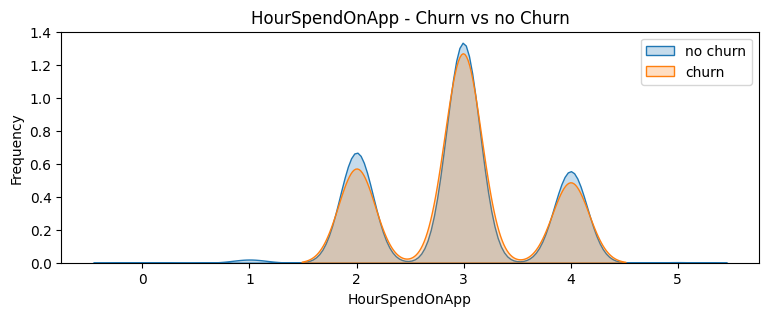

In [484]:
plt.subplots(figsize=(9,3))  # 設置長寬尺寸大小

ax = sns.kdeplot( df.loc[(df['Churn']==0),'HourSpendOnApp'] , fill=True, label='no churn')
ax = sns.kdeplot( df.loc[(df['Churn']==1),'HourSpendOnApp'] , fill=True, label='churn')

plt.title('HourSpendOnApp - Churn vs no Churn')
plt.xlabel("HourSpendOnApp")
plt.ylabel("Frequency")
plt.legend()
plt.show()

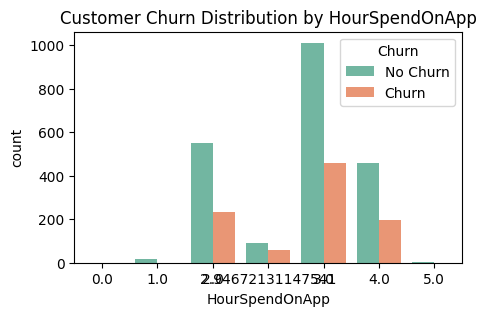

In [485]:
plt.subplots(figsize=(5,3))  # 設置長寬尺寸大小
ax = sns.countplot(x="HourSpendOnApp", hue="Churn", data=df, palette="Set2")
ax.set_title('Customer Churn Distribution by HourSpendOnApp')
plt.legend(title='Churn', labels=["No Churn","Churn"])  #修改圖例
plt.show()

In [486]:
cal = pd.DataFrame(df.groupby([df['HourSpendOnApp'],df['Churn']]).size())
cal2 = pd.DataFrame(df.groupby(df['HourSpendOnApp']).size())
ccc = pd.merge(cal, cal2, left_index=True, right_index=True)
ccc['percentage'] = ccc['0_x']/ccc['0_y']
ccc

0_x   0_y  percentage
HourSpendOnApp Churn                        
0.000000       0         1     1    1.000000
1.000000       0        16    16    1.000000
2.000000       0       550   782    0.703325
               1       232   782    0.296675
2.946721       0        92   150    0.613333
               1        58   150    0.386667
3.000000       0      1011  1471    0.687288
               1       460  1471    0.312712
4.000000       0       457   655    0.697710
               1       198   655    0.302290
5.000000       0         3     3    1.000000

### 顧客在幾個裝置上登入對顧客流失的關係 - NumberOfDeviceRegistered

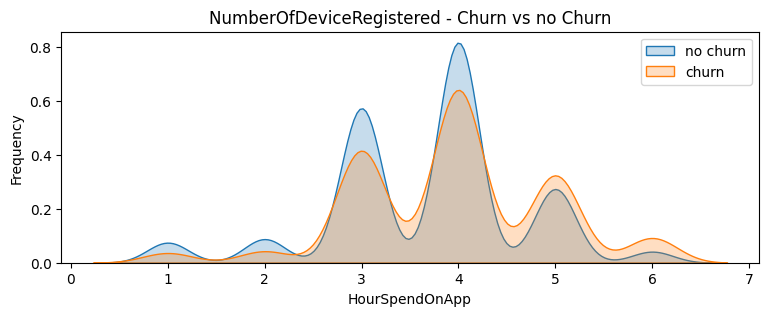

In [487]:
plt.subplots(figsize=(9,3))  # 設置長寬尺寸大小

ax = sns.kdeplot( df.loc[(df['Churn']==0),'NumberOfDeviceRegistered'] , fill=True, label='no churn')
ax = sns.kdeplot( df.loc[(df['Churn']==1),'NumberOfDeviceRegistered'] , fill=True, label='churn')

plt.title('NumberOfDeviceRegistered - Churn vs no Churn')
plt.xlabel("HourSpendOnApp")
plt.ylabel("Frequency")
plt.legend()
plt.show()

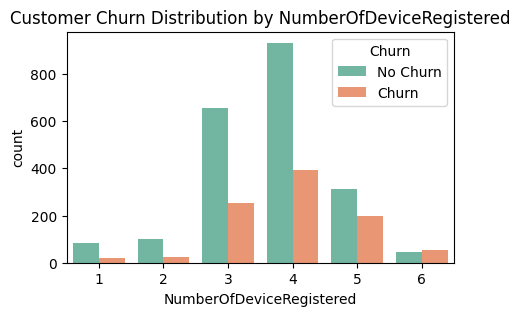

In [488]:
plt.subplots(figsize=(5,3))  # 設置長寬尺寸大小
ax = sns.countplot(x="NumberOfDeviceRegistered", hue="Churn", data=df, palette="Set2")
ax.set_title('Customer Churn Distribution by NumberOfDeviceRegistered')
plt.legend(title='Churn', labels=["No Churn","Churn"])  #修改圖例
plt.show()

In [489]:
cal = pd.DataFrame(df.groupby([df['NumberOfDeviceRegistered'],df['Churn']]).size())
cal2 = pd.DataFrame(df.groupby(df['NumberOfDeviceRegistered']).size())
ccc = pd.merge(cal, cal2, left_index=True, right_index=True)
ccc['percentage'] = ccc['0_x']/ccc['0_y']
ccc

0_x   0_y  percentage
NumberOfDeviceRegistered Churn                       
1                        0       85   107    0.794393
                         1       22   107    0.205607
2                        0      100   126    0.793651
                         1       26   126    0.206349
3                        0      654   908    0.720264
                         1      254   908    0.279736
4                        0      932  1324    0.703927
                         1      392  1324    0.296073
5                        0      312   510    0.611765
                         1      198   510    0.388235
6                        0       47   103    0.456311
                         1       56   103    0.543689

### 顧客習慣用何種裝置登入此網路商店對顧客流失的關係 - PreferredLoginDevice

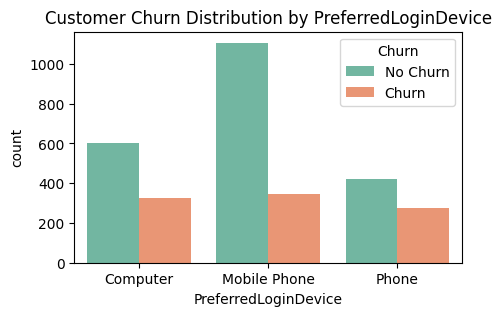

In [490]:
plt.subplots(figsize=(5,3))  # 設置長寬尺寸大小
ax = sns.countplot(x="PreferredLoginDevice", hue="Churn", data=df, palette="Set2")
ax.set_title('Customer Churn Distribution by PreferredLoginDevice')
plt.legend(title='Churn', labels=["No Churn","Churn"])  #修改圖例
plt.show()

In [491]:
cal = pd.DataFrame(df.groupby([df['PreferredLoginDevice'],df['Churn']]).size())
cal2 = pd.DataFrame(df.groupby(df['PreferredLoginDevice']).size())
ccc = pd.merge(cal, cal2, left_index=True, right_index=True)
ccc['percentage'] = ccc['0_x']/ccc['0_y']
ccc

0_x   0_y  percentage
PreferredLoginDevice Churn                        
Computer             0       602   926    0.650108
                     1       324   926    0.349892
Mobile Phone         0      1107  1455    0.760825
                     1       348  1455    0.239175
Phone                0       421   697    0.604017
                     1       276   697    0.395983

### 顧客過去一個月偏好的商品類型對顧客流失的關係 - PreferedOrderCat

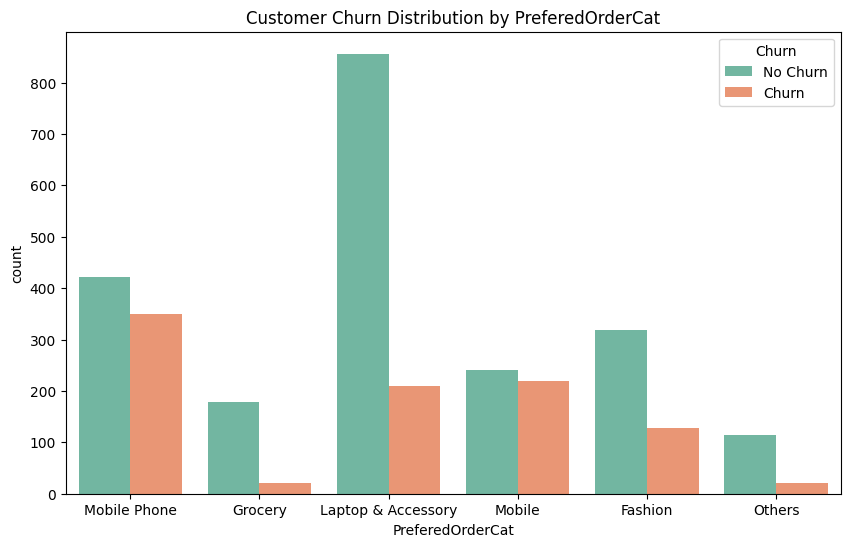

In [492]:
plt.subplots(figsize=(10,6))  # 設置長寬尺寸大小
ax = sns.countplot(x="PreferedOrderCat", hue="Churn", data=df, palette="Set2")
ax.set_title('Customer Churn Distribution by PreferedOrderCat')
plt.legend(title='Churn', labels=["No Churn","Churn"])  #修改圖例
plt.show()

In [493]:
cal = pd.DataFrame(df.groupby([df['PreferedOrderCat'],df['Churn']]).size())
cal2 = pd.DataFrame(df.groupby(df['PreferedOrderCat']).size())
ccc = pd.merge(cal, cal2, left_index=True, right_index=True)
ccc['percentage'] = ccc['0_x']/ccc['0_y']
ccc

0_x   0_y  percentage
PreferedOrderCat   Churn                       
Fashion            0      318   446    0.713004
                   1      128   446    0.286996
Grocery            0      178   198    0.898990
                   1       20   198    0.101010
Laptop & Accessory 0      856  1066    0.803002
                   1      210  1066    0.196998
Mobile             0      241   461    0.522777
                   1      220   461    0.477223
Mobile Phone       0      422   772    0.546632
                   1      350   772    0.453368
Others             0      115   135    0.851852
                   1       20   135    0.148148

### 顧客慣用付款方式對顧客流失的關係 - PreferredPaymentMode

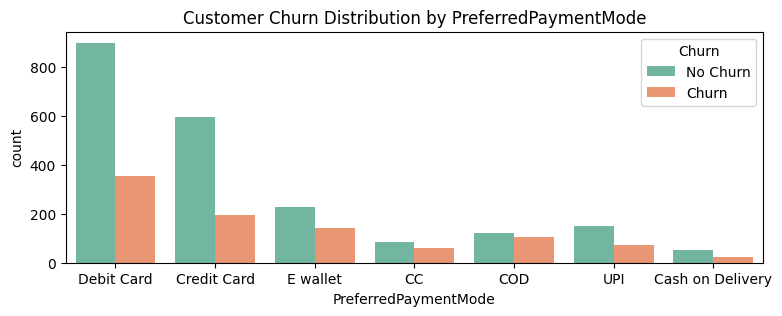

In [494]:
plt.subplots(figsize=(9,3))  # 設置長寬尺寸大小
ax = sns.countplot(x="PreferredPaymentMode", hue="Churn", data=df, palette="Set2")
ax.set_title('Customer Churn Distribution by PreferredPaymentMode')
plt.legend(title='Churn', labels=["No Churn","Churn"])  #修改圖例
plt.show()

In [495]:
cal = pd.DataFrame(df.groupby([df['PreferredPaymentMode'],df['Churn']]).size())
cal2 = pd.DataFrame(df.groupby(df['PreferredPaymentMode']).size())
ccc = pd.merge(cal, cal2, left_index=True, right_index=True)
ccc['percentage'] = ccc['0_x']/ccc['0_y']
ccc

0_x   0_y  percentage
PreferredPaymentMode Churn                       
CC                   0       86   145    0.593103
                     1       59   145    0.406897
COD                  0      120   225    0.533333
                     1      105   225    0.466667
Cash on Delivery     0       54    77    0.701299
                     1       23    77    0.298701
Credit Card          0      594   787    0.754765
                     1      193   787    0.245235
Debit Card           0      899  1255    0.716335
                     1      356  1255    0.283665
E wallet             0      227   367    0.618529
                     1      140   367    0.381471
UPI                  0      150   222    0.675676
                     1       72   222    0.324324

### 3. 消費者的消費行為分析
* Tenure:顧客多久以前開始在此商店消費
* DaySinceLastOrder:距離上次顧客消費的天數
* OrderCount :顧客過去一個月內下訂單的次數
* CouponUsed:顧客過去一個月內用過幾次優惠卷
* CashbackAmount:顧客過去一個月的平均現金回饋
* OrderAmountHikeFromlastYear:相較於去年此顧客的消費增長百分比
* Complain:顧客過去一個月內是否客訴過
* SatisfactionScore:顧客滿意度

### 顧客多久以前開始在此商店消費對顧客流失的關係 - Tenure

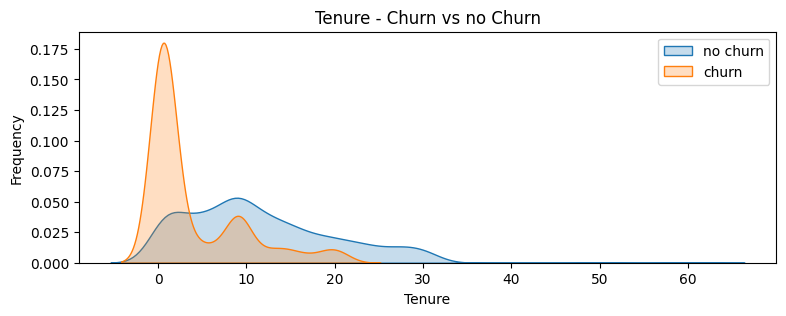

In [496]:
plt.subplots(figsize=(9,3))  # 設置長寬尺寸大小

ax = sns.kdeplot( df.loc[(df['Churn']==0),'Tenure'] , fill=True, label='no churn')
ax = sns.kdeplot( df.loc[(df['Churn']==1),'Tenure'] , fill=True, label='churn')

plt.title('Tenure - Churn vs no Churn')
plt.xlabel("Tenure")
plt.ylabel("Frequency")
plt.legend()
plt.show()

<AxesSubplot: xlabel='Tenure', ylabel='Density'>

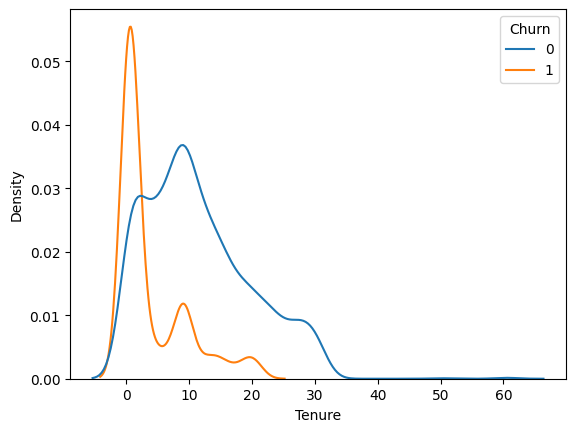

In [497]:
sns.kdeplot(data=df, x="Tenure", hue="Churn", cumulative=False) #占全部的比例

### 距離上次顧客消費的天數對顧客流失的關係 - DaySinceLastOrder

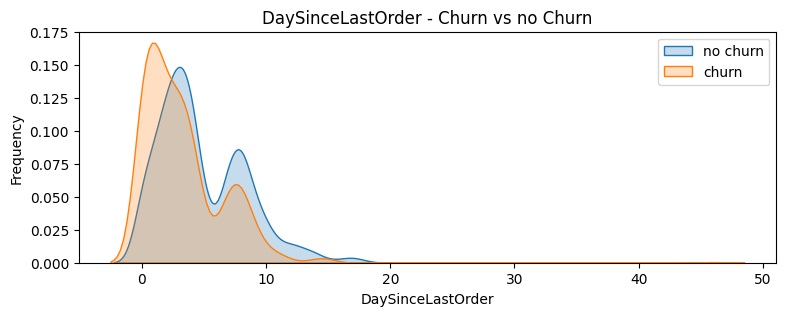

In [498]:
plt.subplots(figsize=(9,3))  # 設置長寬尺寸大小

ax = sns.kdeplot( df.loc[(df['Churn']==0),'DaySinceLastOrder'] , fill=True, label='no churn')
ax = sns.kdeplot( df.loc[(df['Churn']==1),'DaySinceLastOrder'] , fill=True, label='churn')

plt.title('DaySinceLastOrder - Churn vs no Churn')
plt.xlabel("DaySinceLastOrder")
plt.ylabel("Frequency")
plt.legend()
plt.show()

### 顧客過去一個月內下訂單的次數對顧客流失的關係 - OrderCount

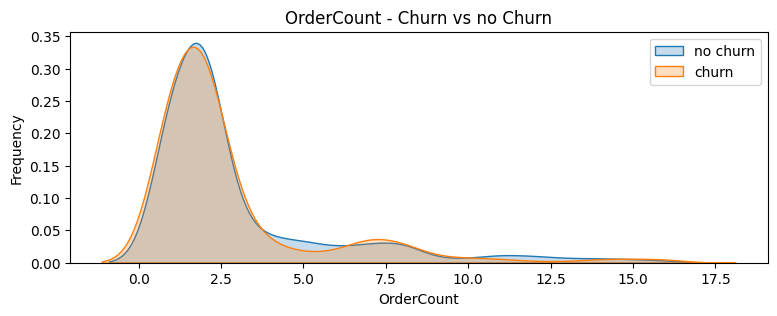

In [499]:
plt.subplots(figsize=(9,3))  # 設置長寬尺寸大小

ax = sns.kdeplot( df.loc[(df['Churn']==0),'OrderCount'] , fill=True, label='no churn')
ax = sns.kdeplot( df.loc[(df['Churn']==1),'OrderCount'] , fill=True, label='churn')

plt.title('OrderCount - Churn vs no Churn')
plt.xlabel("OrderCount")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [500]:
cal = pd.DataFrame(df.groupby([df['OrderCount'],df['Churn']]).size())
cal2 = pd.DataFrame(df.groupby(df['OrderCount']).size())
ccc = pd.merge(cal, cal2, left_index=True, right_index=True)
ccc['percentage'] = ccc['0_x']/ccc['0_y']
ccc

0_x   0_y  percentage
OrderCount Churn                       
1.0        0      634   950    0.667368
           1      316   950    0.332632
2.0        0      884  1272    0.694969
           1      388  1272    0.305031
3.0        0      135   203    0.665025
           1       68   203    0.334975
4.0        0       84   112    0.750000
           1       28   112    0.250000
5.0        0       74    88    0.840909
           1       14    88    0.159091
6.0        0       51    67    0.761194
           1       16    67    0.238806
7.0        0       65   107    0.607477
           1       42   107    0.392523
8.0        0       73   105    0.695238
           1       32   105    0.304762
9.0        0       14    22    0.636364
           1        8    22    0.363636
10.0       0       15    23    0.652174
           1        8    23    0.347826
11.0       0       28    34    0.823529
           1        6    34    0.176471
12.0       0       23    25    0.920000
           1        2    25    0.080000
13.0       0       15    17    0.882353
           1        2    17    0.117647
14.0       0       15    21    0.714286
           1        6    21    0.285714
15.0       0       12    18    0.666667
           1        6    18    0.333333
16.0       0        8    14    0.571429
           1        6    14    0.428571

### 顧客過去一個月內用過幾次優惠卷對顧客流失的關係 - CouponUsed

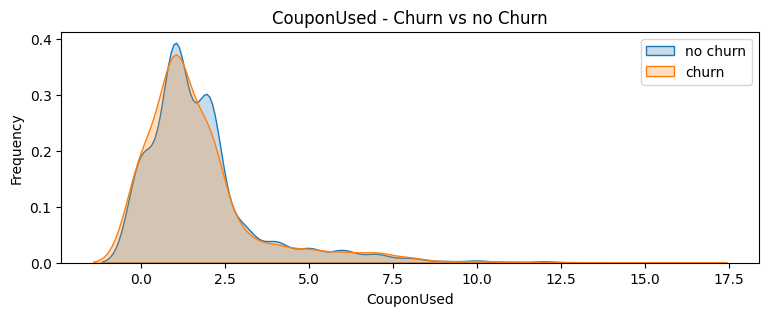

In [501]:
plt.subplots(figsize=(9,3))  # 設置長寬尺寸大小

ax = sns.kdeplot( df.loc[(df['Churn']==0),'CouponUsed'] , fill=True, label='no churn')
ax = sns.kdeplot( df.loc[(df['Churn']==1),'CouponUsed'] , fill=True, label='churn')

plt.title('CouponUsed - Churn vs no Churn')
plt.xlabel("CouponUsed")
plt.ylabel("Frequency")
plt.legend()
plt.show()

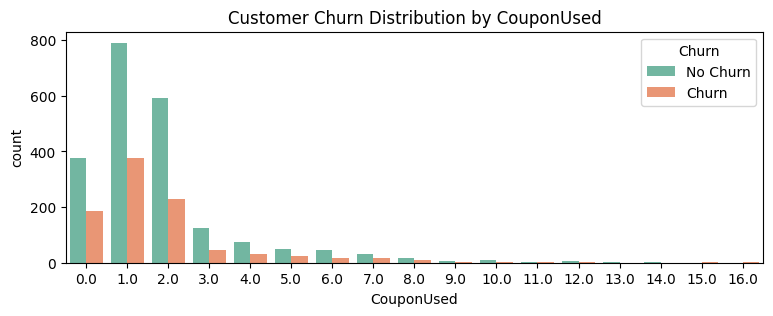

In [502]:
plt.subplots(figsize=(9,3))  # 設置長寬尺寸大小
ax = sns.countplot(x="CouponUsed", hue="Churn", data=df, palette="Set2")
ax.set_title('Customer Churn Distribution by CouponUsed')
plt.legend(title='Churn', labels=["No Churn","Churn"])  #修改圖例
plt.show()

In [503]:
cal = pd.DataFrame(df.groupby([df['CouponUsed'],df['Churn']]).size())
cal2 = pd.DataFrame(df.groupby(df['CouponUsed']).size())
ccc = pd.merge(cal, cal2, left_index=True, right_index=True)
ccc['percentage'] = ccc['0_x']/ccc['0_y']
ccc

0_x   0_y  percentage
CouponUsed Churn                       
0.0        0      376   562    0.669039
           1      186   562    0.330961
1.0        0      791  1169    0.676647
           1      378  1169    0.323353
2.0        0      594   824    0.720874
           1      230   824    0.279126
3.0        0      126   172    0.732558
           1       46   172    0.267442
4.0        0       74   104    0.711538
           1       30   104    0.288462
5.0        0       51    74    0.689189
           1       23    74    0.310811
6.0        0       45    63    0.714286
           1       18    63    0.285714
7.0        0       31    49    0.632653
           1       18    49    0.367347
8.0        0       17    26    0.653846
           1        9    26    0.346154
9.0        0        6     8    0.750000
           1        2     8    0.250000
10.0       0        8    11    0.727273
           1        3    11    0.272727
11.0       0        3     5    0.600000
           1        2     5    0.400000
12.0       0        5     6    0.833333
           1        1     6    0.166667
13.0       0        2     2    1.000000
14.0       0        1     1    1.000000
15.0       1        1     1    1.000000
16.0       1        1     1    1.000000

### 顧客過去一個月的平均現金回饋對顧客流失的關係 - CashbackAmount

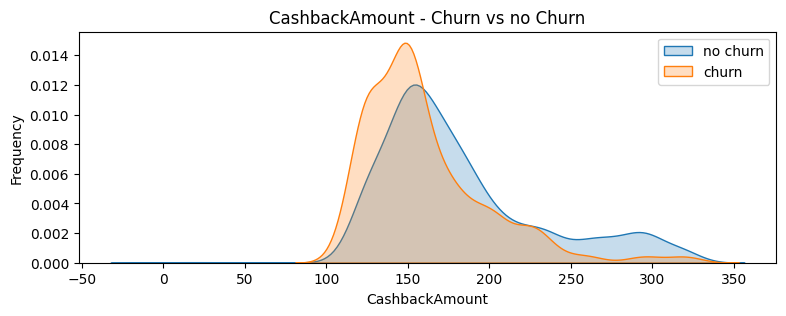

In [504]:
plt.subplots(figsize=(9,3))  # 設置長寬尺寸大小

ax = sns.kdeplot( df.loc[(df['Churn']==0),'CashbackAmount'] , fill=True, label='no churn')
ax = sns.kdeplot( df.loc[(df['Churn']==1),'CashbackAmount'] , fill=True, label='churn')

plt.title('CashbackAmount - Churn vs no Churn')
plt.xlabel("CashbackAmount")
plt.ylabel("Frequency")
plt.legend()
plt.show()

### 相較於去年此顧客的消費增長百分比對顧客流失的關係 - OrderAmountHikeFromlastYear

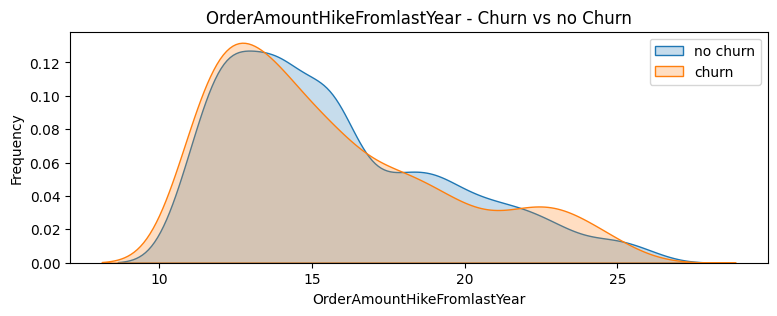

In [505]:
plt.subplots(figsize=(9,3))  # 設置長寬尺寸大小

ax = sns.kdeplot( df.loc[(df['Churn']==0),'OrderAmountHikeFromlastYear'] , fill=True, label='no churn')
ax = sns.kdeplot( df.loc[(df['Churn']==1),'OrderAmountHikeFromlastYear'] , fill=True, label='churn')

plt.title('OrderAmountHikeFromlastYear - Churn vs no Churn')
plt.xlabel("OrderAmountHikeFromlastYear")
plt.ylabel("Frequency")
plt.legend()
plt.show()

### 顧客過去一個月內是否客訴過對顧客流失的關係 - Complain

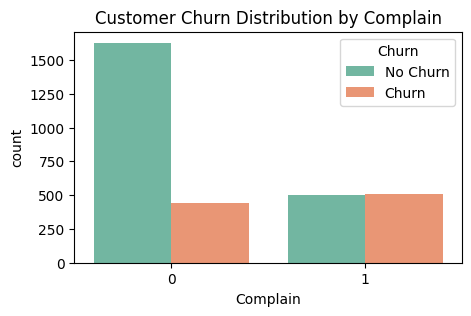

In [506]:
plt.subplots(figsize=(5,3))  # 設置長寬尺寸大小
ax = sns.countplot(x="Complain", hue="Churn", data=df, palette="Set2")
ax.set_title('Customer Churn Distribution by Complain')
plt.legend(title='Churn', labels=["No Churn","Churn"])  #修改圖例
plt.show()

In [507]:
cal = pd.DataFrame(df.groupby([df['Complain'],df['Churn']]).size())
cal2 = pd.DataFrame(df.groupby(df['Complain']).size())
ccc = pd.merge(cal, cal2, left_index=True, right_index=True)
ccc['percentage'] = ccc['0_x']/ccc['0_y']
ccc

0_x   0_y  percentage
Complain Churn                        
0        0      1627  2067    0.787131
         1       440  2067    0.212869
1        0       503  1011    0.497527
         1       508  1011    0.502473

### 顧客滿意度對顧客流失的關係 - SatisfactionScore

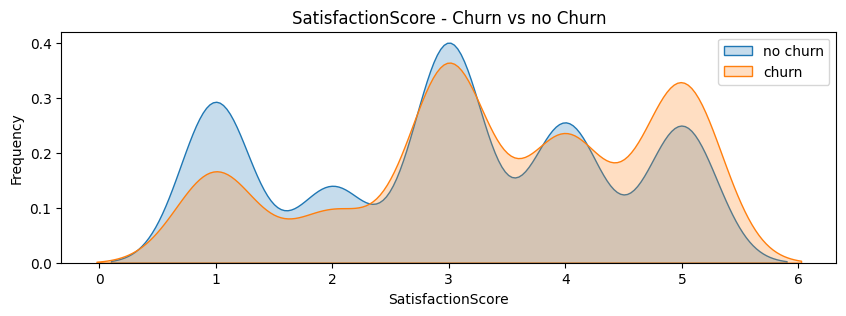

In [508]:
plt.subplots(figsize=(10,3))  # 設置長寬尺寸大小

ax1 = sns.kdeplot( df.loc[(df['Churn']==0),'SatisfactionScore'] , fill=True, label='no churn') #blue #, hue='Churn'
ax2 = sns.kdeplot( df.loc[(df['Churn']==1),'SatisfactionScore'] , fill=True, label='churn') #orange

plt.title('SatisfactionScore - Churn vs no Churn')
plt.xlabel("SatisfactionScore")
plt.ylabel("Frequency")
plt.legend()
plt.show()

<AxesSubplot: xlabel='SatisfactionScore', ylabel='Density'>

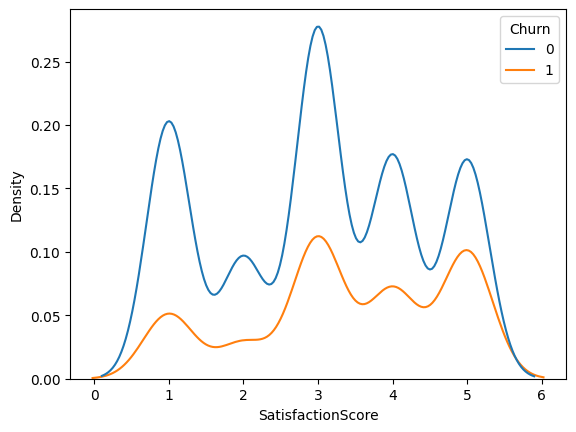

In [509]:
sns.kdeplot(data=df, x="SatisfactionScore", hue="Churn", cumulative=False) #占全部的比例

#之前畫得是分別佔Churn=0或1的比例

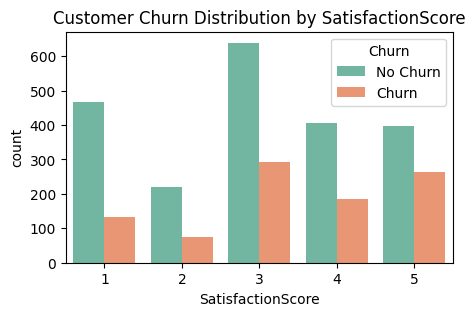

In [510]:
plt.subplots(figsize=(5,3))  # 設置長寬尺寸大小
ax = sns.countplot(x="SatisfactionScore", hue="Churn", data=df, palette="Set2")
ax.set_title('Customer Churn Distribution by SatisfactionScore')
plt.legend(title='Churn', labels=["No Churn","Churn"])  #修改圖例
plt.show()

In [511]:
cal = pd.DataFrame(df.groupby([df['SatisfactionScore'],df['Churn']]).size())
cal2 = pd.DataFrame(df.groupby(df['SatisfactionScore']).size())
ccc = pd.merge(cal, cal2, left_index=True, right_index=True)
ccc['percentage'] = ccc['0_x']/ccc['0_y']
ccc

0_x  0_y  percentage
SatisfactionScore Churn                      
1                 0      468  602    0.777409
                  1      134  602    0.222591
2                 0      220  294    0.748299
                  1       74  294    0.251701
3                 0      639  931    0.686359
                  1      292  931    0.313641
4                 0      405  589    0.687606
                  1      184  589    0.312394
5                 0      398  662    0.601208
                  1      264  662    0.398792

## 六、類別屬性encoding

In [512]:
#查看類別屬性資料
print(df.groupby(['PreferredLoginDevice']).size())     
print('----------------------------------------')
print(df.groupby(['PreferredPaymentMode']).size())  
print('----------------------------------------')
print(df.groupby(['Gender']).size())  
print('----------------------------------------')
print(df.groupby(['PreferedOrderCat']).size())  
print('----------------------------------------')
print(df.groupby(['MaritalStatus']).size())

PreferredLoginDevice
Computer         926
Mobile Phone    1455
Phone            697
dtype: int64
----------------------------------------
PreferredPaymentMode
CC                   145
COD                  225
Cash on Delivery      77
Credit Card          787
Debit Card          1255
E wallet             367
UPI                  222
dtype: int64
----------------------------------------
Gender
Female    1228
Male      1850
dtype: int64
----------------------------------------
PreferedOrderCat
Fashion                446
Grocery                198
Laptop & Accessory    1066
Mobile                 461
Mobile Phone           772
Others                 135
dtype: int64
----------------------------------------
MaritalStatus
Divorced     433
Married     1545
Single      1100
dtype: int64


In [513]:
# 將類別屬性資料做encoding (PreferredLoginDevice、PreferredPaymentMode、Gender、PreferedOrderCat、MaritalStatus)
df = pd.get_dummies(df)
df

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,54023,1,1.000000,1,31.000000,4.000000,5,1,3,1,...,1,0,0,0,0,1,0,0,0,1
1,50266,0,16.000000,1,18.000000,2.000000,4,4,2,0,...,1,0,1,0,0,0,0,0,1,0
2,54985,0,16.000000,1,36.000000,3.000000,6,1,6,0,...,1,0,0,1,0,0,0,0,0,1
3,52029,1,0.000000,3,15.758208,2.000000,4,4,2,1,...,1,0,0,0,1,0,0,0,1,0
4,50084,0,13.000000,1,15.000000,3.000000,4,2,10,0,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3078,51224,0,13.000000,1,6.000000,3.000000,3,5,3,0,...,1,0,1,0,0,0,0,0,1,0
3079,51396,1,11.000000,1,6.000000,3.000000,4,3,10,1,...,1,1,0,0,0,0,0,0,0,1
3080,52017,0,9.115897,1,16.000000,2.000000,3,4,2,0,...,1,0,0,0,1,0,0,0,1,0
3081,50355,1,0.000000,1,13.000000,2.946721,3,3,2,1,...,0,0,0,0,1,0,0,1,0,0


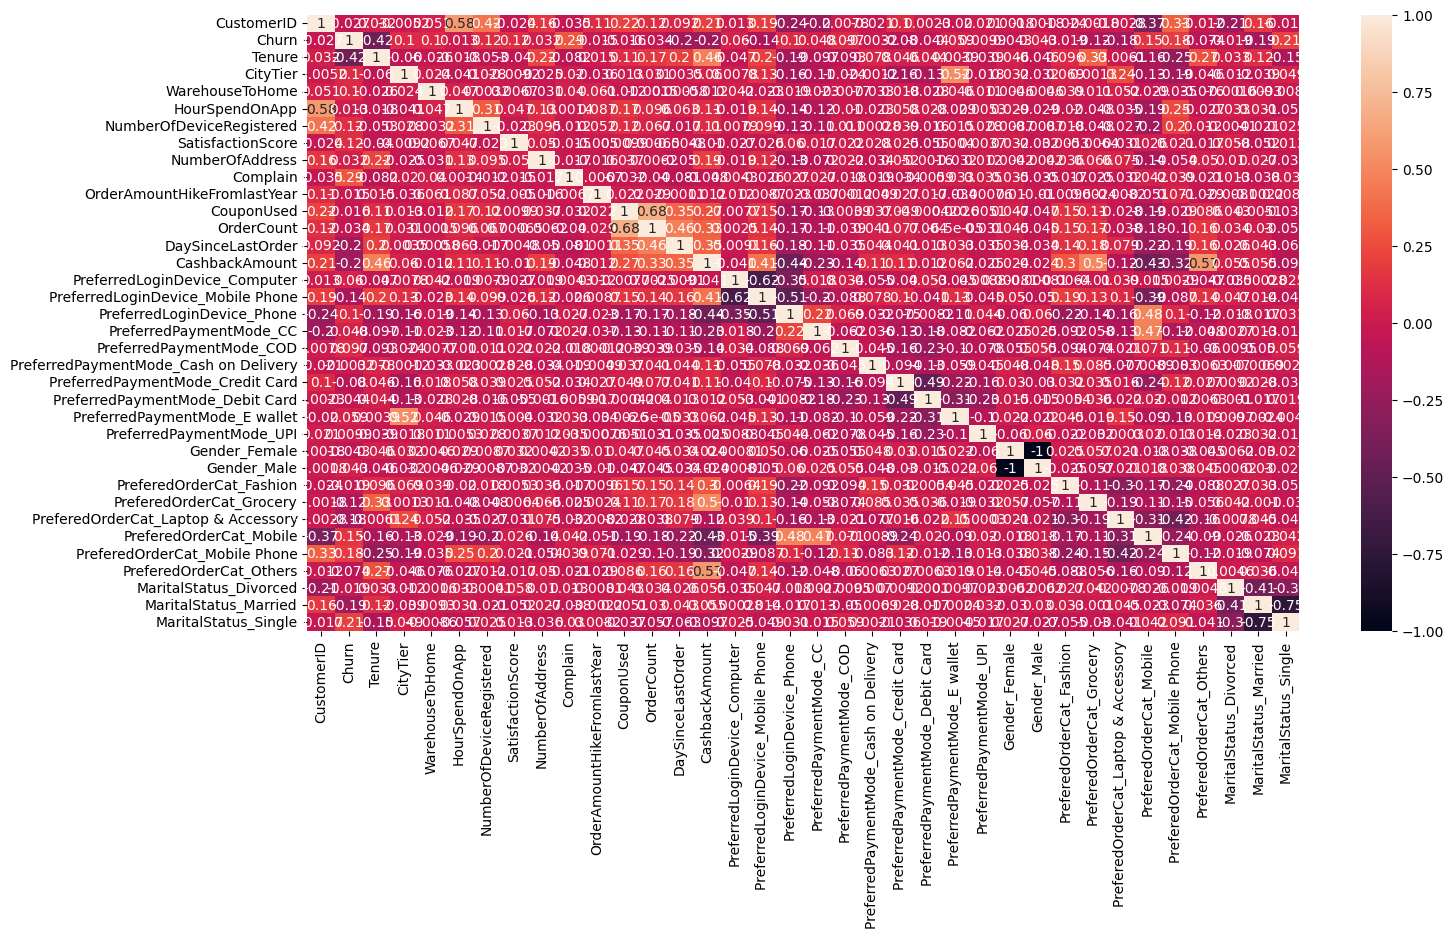

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
CustomerID,1.000000,-0.026877,0.031607,-0.005158,0.051072,0.578722,0.416670,-0.023850,0.156715,-0.035396,...,-0.001818,-0.023927,-0.001801,-0.002832,-0.365283,0.329886,-0.011902,-0.213269,0.164500,-0.016899
Churn,-0.026877,1.000000,-0.419950,0.104360,0.100536,0.013465,0.121608,0.123277,0.031685,0.294616,...,0.043421,-0.018722,-0.117556,-0.175000,0.153852,0.182199,-0.074155,-0.018946,-0.185572,0.207361
Tenure,0.031607,-0.419950,1.000000,-0.060195,-0.026395,-0.017687,-0.052536,-0.039852,0.218848,-0.081886,...,-0.045964,0.095606,0.333205,-0.006104,-0.160547,-0.253553,0.267138,0.032628,0.117487,-0.146251
CityTier,-0.005158,0.104360,-0.060195,1.000000,0.023909,-0.041166,0.027585,-0.009178,-0.025017,0.020360,...,-0.032398,0.068540,0.001306,0.235194,-0.126459,-0.188492,-0.046475,-0.011532,-0.038689,0.048732
WarehouseToHome,0.051072,0.100536,-0.026395,0.023909,1.000000,0.047467,0.003211,0.006668,-0.031420,0.039627,...,-0.004635,0.038799,0.011437,0.051653,-0.028724,-0.035063,-0.076132,-0.001560,0.009285,-0.008555
HourSpendOnApp,0.578722,0.013465,-0.017687,-0.041166,0.047467,1.000000,0.312187,0.046720,0.130366,0.001395,...,-0.028801,-0.020055,-0.048061,-0.034642,-0.188323,0.249160,-0.026712,0.033317,0.031021,-0.056538
NumberOfDeviceRegistered,0.416670,0.121608,-0.052536,0.027585,0.003211,0.312187,1.000000,-0.022655,0.095489,-0.012206,...,-0.008720,0.018234,-0.048492,-0.027225,-0.198840,0.200576,0.011926,-0.004077,-0.021348,0.025231
SatisfactionScore,-0.023850,0.123277,-0.039852,-0.009178,0.006668,0.046720,-0.022655,1.000000,0.049881,-0.015167,...,-0.031880,0.005252,-0.006414,-0.030981,0.025581,0.020553,-0.017445,0.057869,-0.052315,0.012597
NumberOfAddress,0.156715,0.031685,0.218848,-0.025017,-0.031420,0.130366,0.095489,0.049881,1.000000,-0.017301,...,-0.004160,0.035867,0.066028,0.075098,-0.144229,-0.053599,0.049545,0.010129,0.027332,-0.035866
Complain,-0.035396,0.294616,-0.081886,0.020360,0.039627,0.001395,-0.012206,-0.015167,-0.017301,1.000000,...,-0.034824,-0.016691,-0.025476,-0.032187,0.041833,0.038984,-0.021424,0.013483,-0.038007,0.029871


In [514]:
# Using Heatmap to visualize the Correlation.
cor2 = df.corr()
top_corr_fea = cor2.index
plt.figure(figsize=(16,8))
sns.heatmap(df[top_corr_fea].corr(), annot=True)
plt.show()
cor2

In [515]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3078 entries, 0 to 3082
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CustomerID                             3078 non-null   int64  
 1   Churn                                  3078 non-null   int64  
 2   Tenure                                 3078 non-null   float64
 3   CityTier                               3078 non-null   int64  
 4   WarehouseToHome                        3078 non-null   float64
 5   HourSpendOnApp                         3078 non-null   float64
 6   NumberOfDeviceRegistered               3078 non-null   int64  
 7   SatisfactionScore                      3078 non-null   int64  
 8   NumberOfAddress                        3078 non-null   int64  
 9   Complain                               3078 non-null   int64  
 10  OrderAmountHikeFromlastYear            3078 non-null   float64
 11  Coup

## 七、訓練模型及預測顧客是否流失
* Naive-Bayes、Logistic Regression、Decision Tree、RandomForest、XGBoost 模型
* 矩陣當中：<br/>
左上為TP，表示(模型)預測是positive，實際上也是positive的數量 -> True Positive <br/>
左下為FP，表示(模型)預測是positive，實際上卻是negative的數量 -> False Positive <br/>
右上為FN，表示(模型)預測是negative，實際上卻是positive的數量 -> False Negative <br/>
右下為TN，表示(模型)預測是negative，實際上也是negative的數量 -> True Negative <br/>
(TP+TN) / (TP+TN+FN+FP) = Accuracy <br/>
TP / (TP+FP) = Precision <br/>
TP / (TP+FN) = Recall <br/>
F1-Score = 2 / ( (1/ Precision) + (1/ Recall) ) <br/>

In [516]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression  
from sklearn import linear_model
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve,auc

#排除 target(churn)、CustomerID欄位
features = list(df[df.columns.difference(['Churn','CustomerID'])])    
X = df[features]      #將features放入變數X
y = df["Churn"]       #churn欄位則是分類後的結果，放在變數y

# 切分訓練與測試資料 (8:2)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state=0)

In [517]:
# 根據相關係數排除與Churn較無相關性之屬性(排除相對係數絕對值較低者)

#僅留下較重要之input欄位  
X_im = df[['Complain', 'MaritalStatus_Single', 'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Mobile', 'SatisfactionScore',
           'NumberOfDeviceRegistered', 'CityTier', 'PreferredLoginDevice_Phone', 'WarehouseToHome', 'Tenure', 
           'CashbackAmount', 'DaySinceLastOrder', 'MaritalStatus_Married', 'PreferedOrderCat_Laptop & Accessory', 'PreferredLoginDevice_Mobile Phone', 
           'PreferedOrderCat_Grocery']]      #將features放入變數X
y = df["Churn"]       #churn欄位則是分類後的結果，放在變數y

# 切分訓練與測試資料 (8:2)
train_im_X, test_im_X, train_im_y, test_im_y = train_test_split(X_im, y, test_size = 0.2, random_state=0)

### Naive-Bayes

In [518]:
#載入套件
from sklearn.naive_bayes import MultinomialNB

#模型建構/訓練
NB = MultinomialNB()
NB.fit(train_X,train_y)

#使用模型對測試集做預測
pred_NB_y = NB.predict(test_X)

print('1-a\nNaive-Bayes:\n\n使用之model：MultinomialNB()，其參數設定為預設')
print()
# Accuracy,Precision,Recall,F1-score
print("Testing Accuracy :", '%.4f'%accuracy_score(test_y, pred_NB_y))
print("Testing Precision :", '%.4f'%precision_score(test_y, pred_NB_y))
print("Testing Recall :", '%.4f'%recall_score(test_y, pred_NB_y))
print("Testing f1-score :", '%.4f'%f1_score(test_y, pred_NB_y))
# ROC
print('Area under test roc :','%.4f'%roc_auc_score(test_y, pred_NB_y))
# confusionmatrix
cm = confusion_matrix(test_y, pred_NB_y)
print('condusion matrix:\n',cm)

1-a
Naive-Bayes:

使用之model：MultinomialNB()，其參數設定為預設

Testing Accuracy : 0.7451
Testing Precision : 0.5699
Testing Recall : 0.7949
Testing f1-score : 0.6638
Area under test roc : 0.7585
condusion matrix:
 [[304 117]
 [ 40 155]]


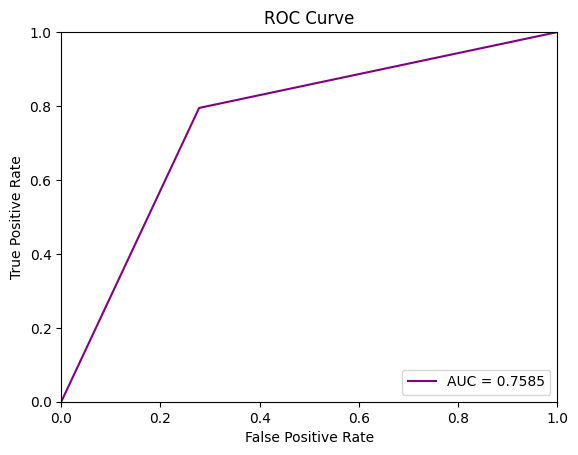

In [519]:
# ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(test_y, pred_NB_y)
auc = auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, color = 'purple', label = 'AUC = %0.4f' % auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()    

In [520]:
#減少input屬性

#模型建構/訓練
NB = MultinomialNB()
NB.fit(train_im_X,train_im_y)

#使用模型對測試集做預測
pred_NB_y_im = NB.predict(test_im_X)

print('1-b\nNaive-Bayes:\n\n使用之model：MultinomialNB()，其參數設定為預設\ninput之屬性僅選取原資料集中的16個（詳見先前說明）')
print()
# Accuracy,Precision,Recall,F1-score
print("Testing Accuracy :", '%.4f'%accuracy_score(test_im_y, pred_NB_y_im))
print("Testing Precision :", '%.4f'%precision_score(test_im_y, pred_NB_y_im))
print("Testing Recall :", '%.4f'%recall_score(test_im_y, pred_NB_y_im))
print("Testing f1-score :", '%.4f'%f1_score(test_im_y, pred_NB_y_im))
# ROC
print('Area under test roc :','%.4f'%roc_auc_score(test_im_y, pred_NB_y_im))
# confusionmatrix
cm = confusion_matrix(test_im_y, pred_NB_y_im)
print('condusion matrix:\n',cm)

1-b
Naive-Bayes:

使用之model：MultinomialNB()，其參數設定為預設
input之屬性僅選取原資料集中的16個（詳見先前說明）

Testing Accuracy : 0.7500
Testing Precision : 0.5762
Testing Recall : 0.7949
Testing f1-score : 0.6681
Area under test roc : 0.7620
condusion matrix:
 [[307 114]
 [ 40 155]]


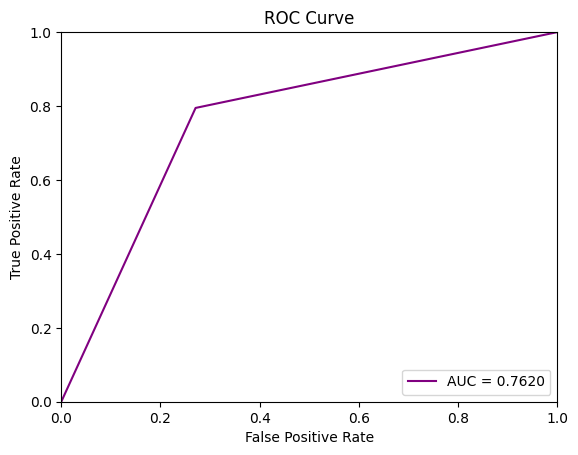

In [521]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(test_im_y, pred_NB_y_im)
auc = auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, color = 'purple', label = 'AUC = %0.4f' % auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()  

In [522]:
#調整超參數

#模型建構/訓練
NB = MultinomialNB(alpha=0.005,
                   fit_prior=False) #預設參數：alpha=1.0, force_alpha=True, fit_prior=True, class_prior=None
NB.fit(train_X,train_y)

#使用模型對測試集做預測
pred_NB_y1 = NB.predict(test_X)
print('1-c\nNaive-Bayes:\n\n使用之model：MultinomialNB(alpha=0.005, fit_prior=False)，其參數設定有做調整而非預設')
print()

# Accuracy,Precision,Recall,F1-score
print("Testing Accuracy :", '%.4f'%accuracy_score(test_y, pred_NB_y1))
print("Testing Precision :", '%.4f'%precision_score(test_y, pred_NB_y1))
print("Testing Recall :", '%.4f'%recall_score(test_y, pred_NB_y1))
print("Testing f1-score :", '%.4f'%f1_score(test_y, pred_NB_y1))
# ROC
print('Area under test roc :','%.4f'%roc_auc_score(test_y, pred_NB_y1))
# confusionmatrix
cm = confusion_matrix(test_y, pred_NB_y1)

1-c
Naive-Bayes:

使用之model：MultinomialNB(alpha=0.005, fit_prior=False)，其參數設定有做調整而非預設

Testing Accuracy : 0.7305
Testing Precision : 0.5505
Testing Recall : 0.8103
Testing f1-score : 0.6556
Area under test roc : 0.7519


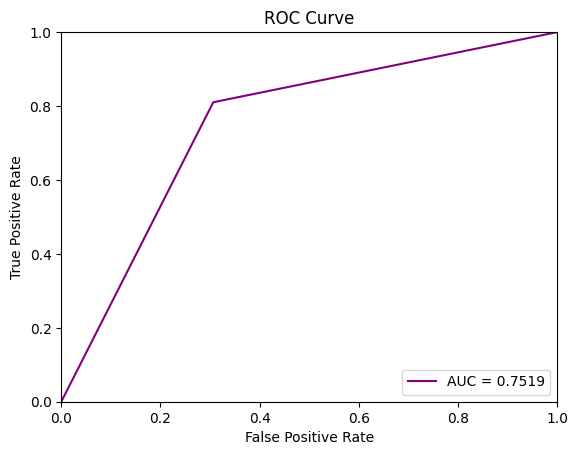

In [523]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(test_y, pred_NB_y1)
auc = auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, color = 'purple', label = 'AUC = %0.4f' % auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()  

### Logistic Regression

In [524]:
#模型建構/訓練
lr = linear_model.LogisticRegression(max_iter=1500)
lr.fit(train_X,train_y)

#使用模型對測試集做預測
pred_lr_y = lr.predict(test_X)
# Logistic Regression
print('2-a\nLogistic Regression:\n\n使用之model：linear_model.LogisticRegression(max_iter=1500)，其參數設定除了max_iter=1500其餘為預設')
print()

# Accuracy,Precision,Recall,F1-score
print("Testing Accuracy :", '%.4f'%accuracy_score(test_y, pred_lr_y))
print("Testing Precision :", '%.4f'%precision_score(test_y, pred_lr_y))
print("Testing Recall :", '%.4f'%recall_score(test_y, pred_lr_y))
print("Testing f1-score :", '%.4f'%f1_score(test_y, pred_lr_y))
# ROC
print('Area under test roc :','%.4f'%roc_auc_score(test_y,pred_lr_y))
# confusionmatrix
cm = confusion_matrix(test_y, pred_lr_y)
print('condusion matrix:\n',cm)

2-a
Logistic Regression:

使用之model：linear_model.LogisticRegression(max_iter=1500)，其參數設定除了max_iter=1500其餘為預設

Testing Accuracy : 0.8474
Testing Precision : 0.7988
Testing Recall : 0.6923
Testing f1-score : 0.7418
Area under test roc : 0.8058
condusion matrix:
 [[387  34]
 [ 60 135]]


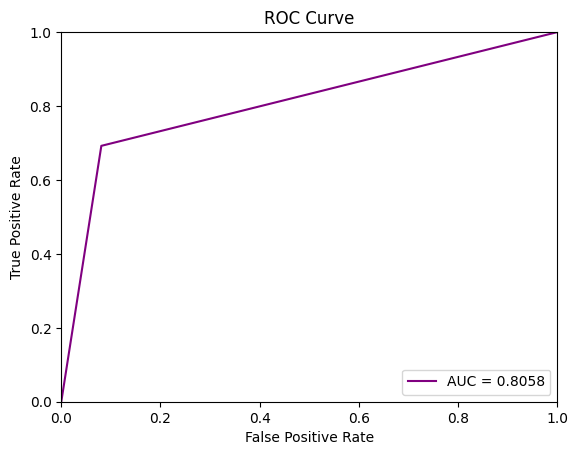

In [525]:
# ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(test_y, pred_lr_y)
auc = auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, color = 'purple', label = 'AUC = %0.4f' % auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()    

In [526]:
#減少input屬性

#模型建構/訓練
lr = linear_model.LogisticRegression(max_iter=1500)
lr.fit(train_im_X,train_im_y)

#使用模型對測試集做預測
pred_lr_y_im = lr.predict(test_im_X)

print('2-b\nLogistic Regression:\n\n使用之model：linear_model.LogisticRegression(max_iter=1500)，其參數設定除了max_iter=1500其餘為預設\ninput之屬性僅選取原資料集中的16個（詳見先前說明）')
print()
# Accuracy,Precision,Recall,F1-score
print("Testing Accuracy :", '%.4f'%accuracy_score(test_im_y, pred_lr_y_im))
print("Testing Precision :", '%.4f'%precision_score(test_im_y, pred_lr_y_im))
print("Testing Recall :", '%.4f'%recall_score(test_im_y, pred_lr_y_im))
print("Testing f1-score :", '%.4f'%f1_score(test_im_y, pred_lr_y_im))
# ROC
print('Area under test roc :','%.4f'%roc_auc_score(test_im_y, pred_lr_y_im))
# confusionmatrix
cm = confusion_matrix(test_im_y, pred_lr_y_im)
print('condusion matrix:\n',cm)

2-b
Logistic Regression:

使用之model：linear_model.LogisticRegression(max_iter=1500)，其參數設定除了max_iter=1500其餘為預設
input之屬性僅選取原資料集中的16個（詳見先前說明）

Testing Accuracy : 0.8166
Testing Precision : 0.7384
Testing Recall : 0.6513
Testing f1-score : 0.6921
Area under test roc : 0.7722
condusion matrix:
 [[376  45]
 [ 68 127]]


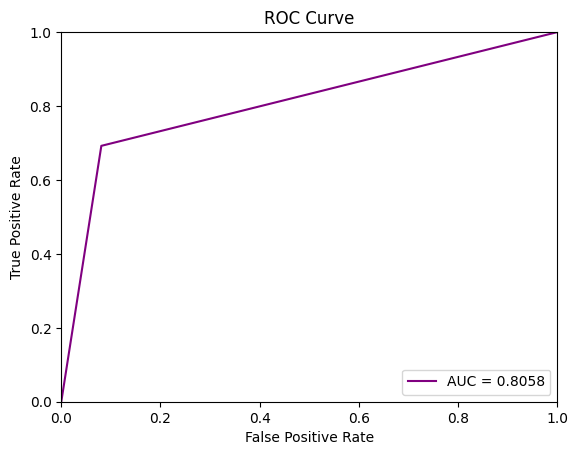

In [527]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(test_im_y, pred_lr_y)
auc = auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, color = 'purple', label = 'AUC = %0.4f' % auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

In [528]:
#調整超參數

#模型建構/訓練
lr = linear_model.LogisticRegression(max_iter=1500,
                                     C=0.2)          #預設參數：max_iter=100, penalty='l2', dual=False, C=1.0, fit_intercept=True, solver='lbfgs'
lr.fit(train_X,train_y)

#使用模型對測試集做預測
pred_lr_y1 = lr.predict(test_X)
# Logistic Regression
print('2-c\nLogistic Regression:\n\n使用之model：linear_model.LogisticRegression(max_iter=1500, C=0.2)，其參數設定有做調整非預設')
print()

# Accuracy,Precision,Recall,F1-score
print("Testing Accuracy :", '%.4f'%accuracy_score(test_y, pred_lr_y1))
print("Testing Precision :", '%.4f'%precision_score(test_y, pred_lr_y1))
print("Testing Recall :", '%.4f'%recall_score(test_y, pred_lr_y1))
print("Testing f1-score :", '%.4f'%f1_score(test_y, pred_lr_y1))
# ROC
print('Area under test roc :','%.4f'%roc_auc_score(test_y,pred_lr_y1))
# confusionmatrix
cm = confusion_matrix(test_y, pred_lr_y1)
print('condusion matrix:\n',cm)

2-c
Logistic Regression:

使用之model：linear_model.LogisticRegression(max_iter=1500, C=0.2)，其參數設定有做調整非預設

Testing Accuracy : 0.8539
Testing Precision : 0.8144
Testing Recall : 0.6974
Testing f1-score : 0.7514
Area under test roc : 0.8119
condusion matrix:
 [[390  31]
 [ 59 136]]


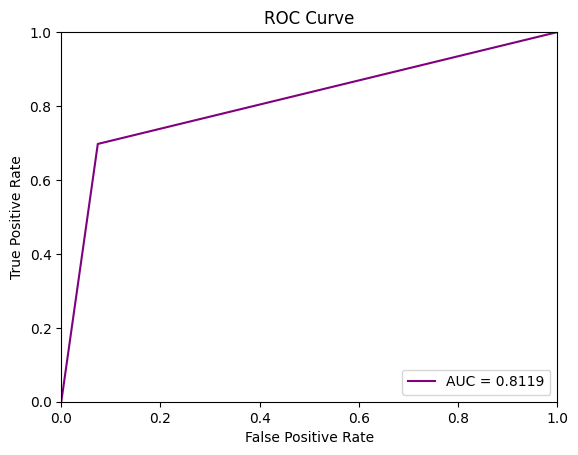

In [529]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(test_y, pred_lr_y1)
auc = auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, color = 'purple', label = 'AUC = %0.4f' % auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

### Decision Tree

In [530]:
from sklearn import tree  #匯入tree模組

#模型建構/訓練
dt = tree.DecisionTreeClassifier()
dt = dt.fit(train_X, train_y)

#使用模型對測試集做預測
pred_dt_y = dt.predict(test_X)
# Decision Tree
print('Decision Tree: ')
print('3-a\nDecision Tree:\n\n使用之model：tree.DecisionTreeClassifier()，其參數設定為預設')
print()

# Accuracy,Precision,Recall,F1-score
print("Testing Accuracy :", '%.4f'%accuracy_score(test_y, pred_dt_y))
print("Testing Precision :", '%.4f'%precision_score(test_y, pred_dt_y))
print("Testing Recall :", '%.4f'%recall_score(test_y, pred_dt_y))
print("Testing f1-score :", '%.4f'%f1_score(test_y, pred_dt_y))
# ROC
print('Area under test roc :','%.4f'%roc_auc_score(test_y, pred_dt_y))
# confusionmatrix
cm = confusion_matrix(test_y, pred_dt_y)
print('condusion matrix:\n',cm)

Decision Tree: 
3-a
Decision Tree:

使用之model：tree.DecisionTreeClassifier()，其參數設定為預設

Testing Accuracy : 0.9448
Testing Precision : 0.8927
Testing Recall : 0.9385
Testing f1-score : 0.9150
Area under test roc : 0.9431
condusion matrix:
 [[399  22]
 [ 12 183]]


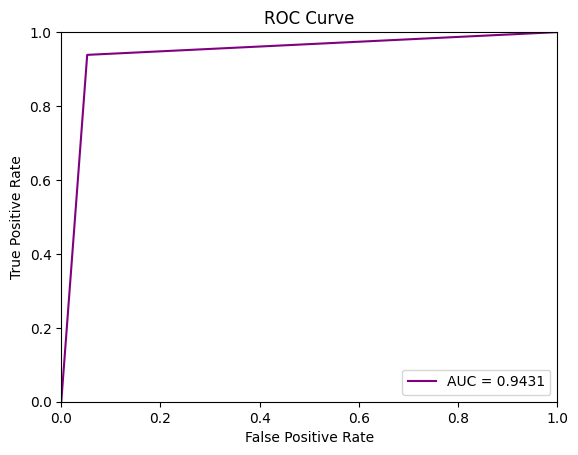

In [531]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(test_y, pred_dt_y)
auc = auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, color = 'purple', label = 'AUC = %0.4f' % auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()    

In [532]:
#減少input屬性

#模型建構/訓練
dt = tree.DecisionTreeClassifier()
dt.fit(train_im_X,train_im_y)

#使用模型對測試集做預測
pred_dt_y_im = dt.predict(test_im_X)

print('3-b\nDecision Tree:\n\n使用之model：tree.DecisionTreeClassifier()，其參數設定為預設\ninput之屬性僅選取原資料集中的16個（詳見先前說明）')
print()
# Accuracy,Precision,Recall,F1-score
print("Testing Accuracy :", '%.4f'%accuracy_score(test_im_y, pred_dt_y_im))
print("Testing Precision :", '%.4f'%precision_score(test_im_y, pred_dt_y_im))
print("Testing Recall :", '%.4f'%recall_score(test_im_y, pred_dt_y_im))
print("Testing f1-score :", '%.4f'%f1_score(test_im_y, pred_dt_y_im))
# ROC
print('Area under test roc :','%.4f'%roc_auc_score(test_im_y, pred_dt_y_im))
# confusionmatrix
cm = confusion_matrix(test_im_y, pred_dt_y_im)
print('condusion matrix:\n',cm)

3-b
Decision Tree:

使用之model：tree.DecisionTreeClassifier()，其參數設定為預設
input之屬性僅選取原資料集中的16個（詳見先前說明）

Testing Accuracy : 0.8994
Testing Precision : 0.8213
Testing Recall : 0.8718
Testing f1-score : 0.8458
Area under test roc : 0.8920
condusion matrix:
 [[384  37]
 [ 25 170]]


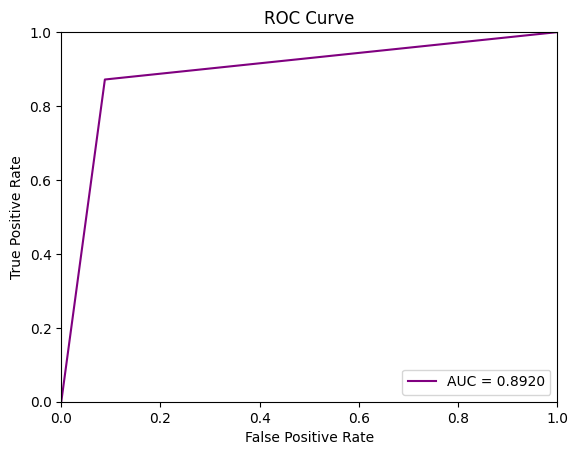

In [533]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(test_im_y, pred_dt_y_im)
auc = auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, color = 'purple', label = 'AUC = %0.4f' % auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

In [534]:
#調整超參數

#模型建構/訓練
dt = tree.DecisionTreeClassifier(min_samples_leaf=3,
                                 max_depth=30,
                                 criterion="entropy") #預設參數：criterion='gini', max_depth=None, min_samples_leaf=1, splitter='best', max_features=None
dt = dt.fit(train_X, train_y)

#使用模型對測試集做預測
pred_dt_y1 = dt.predict(test_X)
# Decision Tree
print('3-c\nDecision Tree:\n\n使用之model：tree.DecisionTreeClassifier(min_samples_leaf=3, max_depth=30, criterion="entropy")，其參數設定有做調整非預設')
print()
      
# Accuracy,Precision,Recall,F1-score
print("Testing Accuracy :", '%.4f'%accuracy_score(test_y, pred_dt_y1))
print("Testing Precision :", '%.4f'%precision_score(test_y, pred_dt_y1))
print("Testing Recall :", '%.4f'%recall_score(test_y, pred_dt_y1))
print("Testing f1-score :", '%.4f'%f1_score(test_y, pred_dt_y1))
# ROC
print('Area under test roc :','%.4f'%roc_auc_score(test_y, pred_dt_y1))
# confusionmatrix
cm = confusion_matrix(test_y, pred_dt_y1)
print('condusion matrix:\n',cm)

3-c
Decision Tree:

使用之model：tree.DecisionTreeClassifier(min_samples_leaf=3, max_depth=30, criterion="entropy")，其參數設定有做調整非預設

Testing Accuracy : 0.8912
Testing Precision : 0.8107
Testing Recall : 0.8564
Testing f1-score : 0.8329
Area under test roc : 0.8819
condusion matrix:
 [[382  39]
 [ 28 167]]


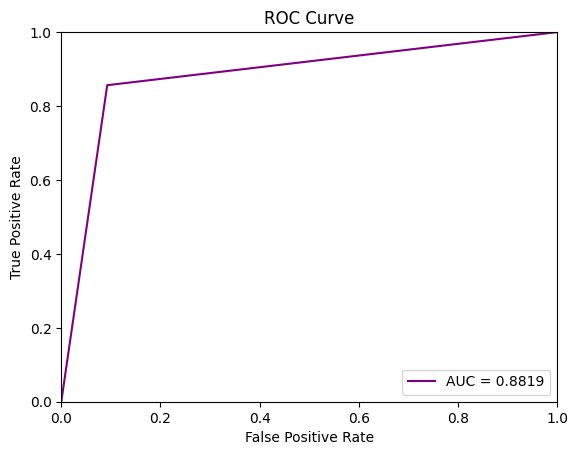

In [535]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(test_y, pred_dt_y1)
auc = auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, color = 'purple', label = 'AUC = %0.4f' % auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

### RandomForest

In [536]:
from sklearn.ensemble import RandomForestClassifier

#模型建構/訓練
rf = RandomForestClassifier()
rf = rf.fit(train_X, train_y)

#使用模型對測試集做預測
pred_rf_y = rf.predict(test_X)
# Random Forest
print('4-a\nRandom Forest:\n\n使用之model：RandomForestClassifier()，其參數設定為預設')
print()

# Accuracy,Precision,Recall,F1-score
print("Testing Accuracy :", '%.4f'%accuracy_score(test_y, pred_rf_y))
print("Testing Precision :", '%.4f'%precision_score(test_y, pred_rf_y))
print("Testing Recall :", '%.4f'%recall_score(test_y, pred_rf_y))
print("Testing f1-score :", '%.4f'%f1_score(test_y, pred_rf_y))
# ROC
print('Area under test roc :','%.4f'%roc_auc_score(test_y, pred_rf_y))
# confusionmatrix
cm = confusion_matrix(test_y, pred_rf_y)
print('condusion matrix:\n',cm)

4-a
Random Forest:

使用之model：RandomForestClassifier()，其參數設定為預設

Testing Accuracy : 0.9464
Testing Precision : 0.9263
Testing Recall : 0.9026
Testing f1-score : 0.9143
Area under test roc : 0.9347
condusion matrix:
 [[407  14]
 [ 19 176]]


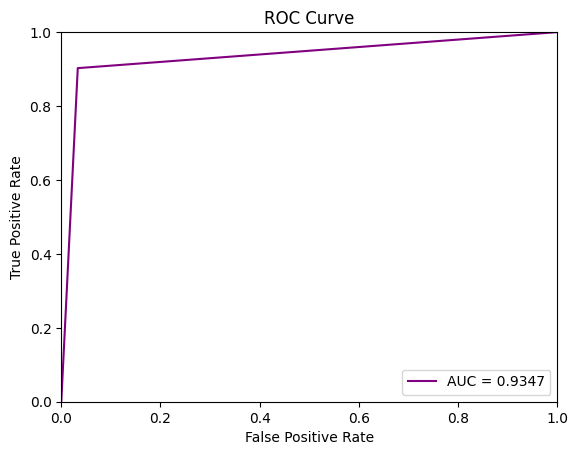

In [537]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(test_y, pred_rf_y)
auc = auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, color = 'purple', label = 'AUC = %0.4f' % auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()    

### 查看feature重要性

Feature: 0, Score: 0.08728
Feature: 1, Score: 0.02392
Feature: 2, Score: 0.06107
Feature: 3, Score: 0.03037
Feature: 4, Score: 0.05721
Feature: 5, Score: 0.01243
Feature: 6, Score: 0.01301
Feature: 7, Score: 0.01967
Feature: 8, Score: 0.00672
Feature: 9, Score: 0.01801
Feature: 10, Score: 0.02297
Feature: 11, Score: 0.04996
Feature: 12, Score: 0.03396
Feature: 13, Score: 0.04846
Feature: 14, Score: 0.03157
Feature: 15, Score: 0.00786
Feature: 16, Score: 0.00409
Feature: 17, Score: 0.01746
Feature: 18, Score: 0.00956
Feature: 19, Score: 0.01234
Feature: 20, Score: 0.00264
Feature: 21, Score: 0.01204
Feature: 22, Score: 0.01325
Feature: 23, Score: 0.00877
Feature: 24, Score: 0.00333
Feature: 25, Score: 0.00893
Feature: 26, Score: 0.00310
Feature: 27, Score: 0.01287
Feature: 28, Score: 0.01325
Feature: 29, Score: 0.00899
Feature: 30, Score: 0.00539
Feature: 31, Score: 0.04170
Feature: 32, Score: 0.23451
Feature: 33, Score: 0.06329


<BarContainer object of 34 artists>

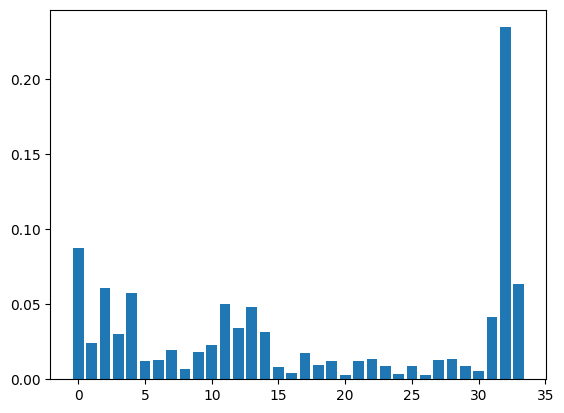

In [538]:
from matplotlib import pyplot
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)

In [539]:
df_col = list(X.columns) #因模型fit時，是用X的資料，所以應以X的欄位順序來找出要求的屬性(而不是用new_df)
df_col

['CashbackAmount',
 'CityTier',
 'Complain',
 'CouponUsed',
 'DaySinceLastOrder',
 'Gender_Female',
 'Gender_Male',
 'HourSpendOnApp',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'NumberOfAddress',
 'NumberOfDeviceRegistered',
 'OrderAmountHikeFromlastYear',
 'OrderCount',
 'PreferedOrderCat_Fashion',
 'PreferedOrderCat_Grocery',
 'PreferedOrderCat_Laptop & Accessory',
 'PreferedOrderCat_Mobile',
 'PreferedOrderCat_Mobile Phone',
 'PreferedOrderCat_Others',
 'PreferredLoginDevice_Computer',
 'PreferredLoginDevice_Mobile Phone',
 'PreferredLoginDevice_Phone',
 'PreferredPaymentMode_CC',
 'PreferredPaymentMode_COD',
 'PreferredPaymentMode_Cash on Delivery',
 'PreferredPaymentMode_Credit Card',
 'PreferredPaymentMode_Debit Card',
 'PreferredPaymentMode_E wallet',
 'PreferredPaymentMode_UPI',
 'SatisfactionScore',
 'Tenure',
 'WarehouseToHome']

### 找出前15個重要的feature

In [540]:
#僅留下較重要之input欄位
X_rf = df[['Tenure', 'CashbackAmount', 'WarehouseToHome', 'Complain', 'DaySinceLastOrder',
           'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'SatisfactionScore', 'NumberOfDeviceRegistered', 'OrderCount', 
           'CouponUsed', 'MaritalStatus_Single', 'CityTier', 'HourSpendOnApp', 'MaritalStatus_Married']]      #將features放入變數X
y = df["Churn"]       #churn欄位則是分類後的結果，放在變數y

# 切分訓練與測試資料 (8:2)
train_rf_X, test_rf_X, train_rf_y, test_rf_y = train_test_split(X_rf, y, test_size = 0.2, random_state=0)

#模型建構/訓練
rf = RandomForestClassifier()
rf = rf.fit(train_rf_X, train_rf_y)

#使用模型對測試集做預測
pred_rf_y_rf = rf.predict(test_rf_X)
# Random Forest
print('Random Forest (只留前15重要的屬性): ')
print('4-b\nRandom Forest:\n\n使用之model：RandomForestClassifier()，其參數設定為預設')
print('input之屬性僅選取原資料集中的15個，其中選取的根據是利用4-a的模型結果找出前15個重要的屬性')
print()

# Accuracy,Precision,Recall,F1-score
print("Testing Accuracy :", '%.4f'%accuracy_score(test_rf_y, pred_rf_y_rf))
print("Testing Precision :", '%.4f'%precision_score(test_rf_y, pred_rf_y_rf))
print("Testing Recall :", '%.4f'%recall_score(test_rf_y, pred_rf_y_rf))
print("Testing f1-score :", '%.4f'%f1_score(test_rf_y, pred_rf_y_rf))
# ROC
print('Area under test roc :','%.4f'%roc_auc_score(test_rf_y, pred_rf_y_rf))
# confusionmatrix
cm = confusion_matrix(test_rf_y, pred_rf_y_rf)
print('condusion matrix:\n',cm)

Random Forest (只留前15重要的屬性): 
4-b
Random Forest:

使用之model：RandomForestClassifier()，其參數設定為預設
input之屬性僅選取原資料集中的15個，其中選取的根據是利用4-a的模型結果找出前15個重要的屬性

Testing Accuracy : 0.9318
Testing Precision : 0.9180
Testing Recall : 0.8615
Testing f1-score : 0.8889
Area under test roc : 0.9130
condusion matrix:
 [[406  15]
 [ 27 168]]


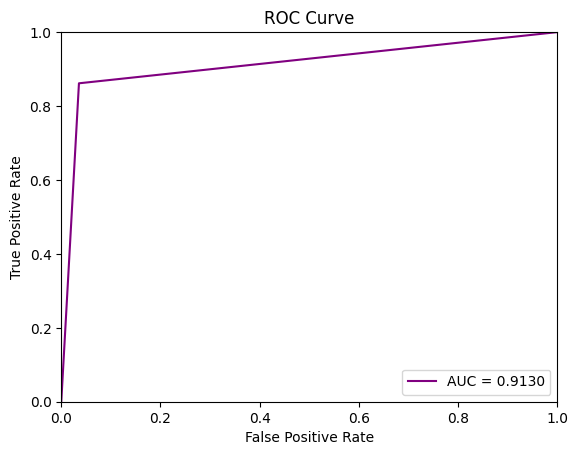

In [541]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(test_im_y, pred_rf_y_rf)
auc = auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, color = 'purple', label = 'AUC = %0.4f' % auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()  

In [542]:
#調整超參數

#模型建構/訓練
rf = RandomForestClassifier(n_estimators=120,
                            criterion='entropy',
                            max_depth=25,
                            max_features=20,
                            min_samples_leaf=2)   #預設參數：n_estimators=100, criterion='gini, max_depth=None, min_samples_leaf=1, max_features=sqrt, bootstrap=True, oob_score=False                        oob_score=True,
rf = rf.fit(train_X, train_y)

#使用模型對測試集做預測
pred_rf_y2 = rf.predict(test_X)
# Random Forest
print('4-c\nRandom Forest:\n\n使用之model：RandomForestClassifier(n_estimators=120, criterion=\'entropy\', max_depth=25, max_features=20, min_samples_leaf=2)，其參數設定有做調整非預設')
print()

# Accuracy,Precision,Recall,F1-score
print("Testing Accuracy :", '%.4f'%accuracy_score(test_y, pred_rf_y2))
print("Testing Precision :", '%.4f'%precision_score(test_y, pred_rf_y2))
print("Testing Recall :", '%.4f'%recall_score(test_y, pred_rf_y2))
print("Testing f1-score :", '%.4f'%f1_score(test_y, pred_rf_y2))
# ROC
print('Area under test roc :','%.4f'%roc_auc_score(test_y, pred_rf_y2))
# confusionmatrix
cm = confusion_matrix(test_y, pred_rf_y2)
print('condusion matrix:\n',cm)

4-c
Random Forest:

使用之model：RandomForestClassifier(n_estimators=120, criterion='entropy', max_depth=25, max_features=20, min_samples_leaf=2)，其參數設定有做調整非預設

Testing Accuracy : 0.9351
Testing Precision : 0.9016
Testing Recall : 0.8923
Testing f1-score : 0.8969
Area under test roc : 0.9236
condusion matrix:
 [[402  19]
 [ 21 174]]


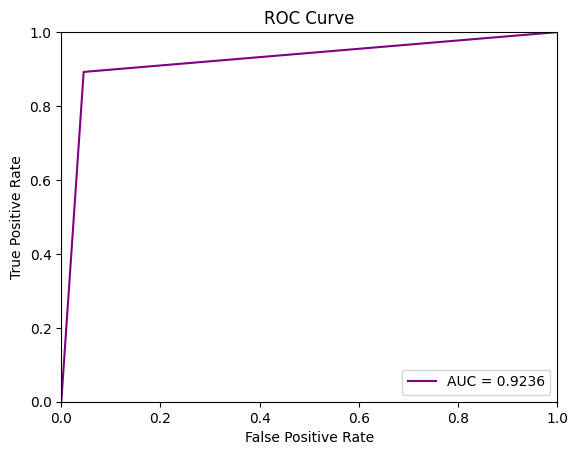

In [543]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(test_y, pred_rf_y2)
auc = auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, color = 'purple', label = 'AUC = %0.4f' % auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()  

### XGBoost

In [544]:
from xgboost import XGBClassifier

#模型建構/訓練
xgb = XGBClassifier()
xgb = xgb.fit(train_X, train_y)

#使用模型對測試集做預測
pred_xgb_y = xgb.predict(test_X)
# XGBoost
print('5-a\nXGBoost:\n\n使用之model：XGBClassifier()，其參數設定為預設')
print()

# Accuracy,Precision,Recall,F1-score
print("Testing Accuracy :", '%.4f'%accuracy_score(test_y, pred_xgb_y))
print("Testing Precision :", '%.4f'%precision_score(test_y, pred_xgb_y))
print("Testing Recall :", '%.4f'%recall_score(test_y, pred_xgb_y))
print("Testing f1-score :", '%.4f'%f1_score(test_y, pred_xgb_y))
# ROC
print('Area under test roc :','%.4f'%roc_auc_score(test_y, pred_xgb_y))
# confusionmatrix
cm = confusion_matrix(test_y, pred_xgb_y)
print('condusion matrix:\n',cm)

5-a
XGBoost:

使用之model：XGBClassifier()，其參數設定為預設

Testing Accuracy : 0.9497
Testing Precision : 0.9059
Testing Recall : 0.9385
Testing f1-score : 0.9219
Area under test roc : 0.9467
condusion matrix:
 [[402  19]
 [ 12 183]]


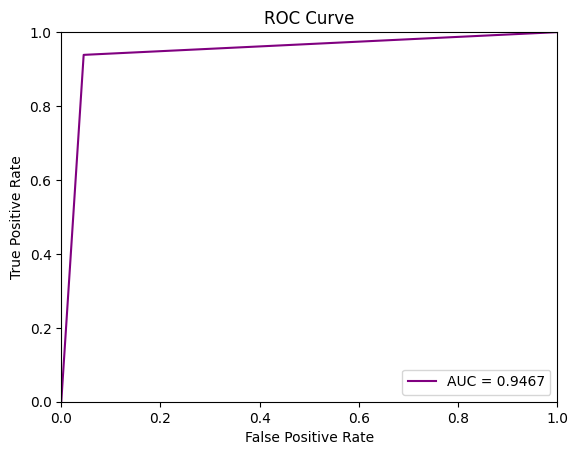

In [545]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(test_y, pred_xgb_y)
auc = auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, color = 'purple', label = 'AUC = %0.4f' % auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()    

In [546]:
#減少input屬性

#模型建構/訓練
xgb = XGBClassifier()
xgb.fit(train_im_X,train_im_y)

#使用模型對測試集做預測
pred_xgb_y_im = xgb.predict(test_im_X)

print('5-b\nXGBoost:\n\n使用之model：XGBClassifier()，其參數設定為預設')
print('input之屬性僅選取原資料集中的16個（詳見先前說明）')
print()
# Accuracy,Precision,Recall,F1-score
print("Testing Accuracy :", '%.4f'%accuracy_score(test_im_y, pred_xgb_y_im))
print("Testing Precision :", '%.4f'%precision_score(test_im_y, pred_xgb_y_im))
print("Testing Recall :", '%.4f'%recall_score(test_im_y, pred_xgb_y_im))
print("Testing f1-score :", '%.4f'%f1_score(test_im_y, pred_xgb_y_im))
# ROC
print('Area under test roc :','%.4f'%roc_auc_score(test_im_y, pred_xgb_y_im))
# confusionmatrix
cm = confusion_matrix(test_im_y, pred_xgb_y_im)
print('condusion matrix:\n',cm)

5-b
XGBoost:

使用之model：XGBClassifier()，其參數設定為預設
input之屬性僅選取原資料集中的16個（詳見先前說明）

Testing Accuracy : 0.9367
Testing Precision : 0.9021
Testing Recall : 0.8974
Testing f1-score : 0.8997
Area under test roc : 0.9262
condusion matrix:
 [[402  19]
 [ 20 175]]


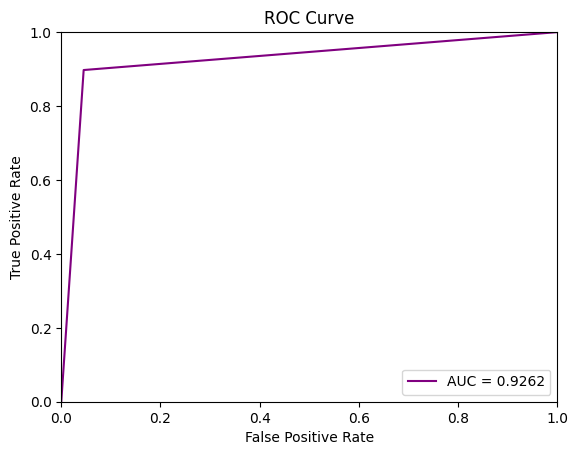

In [547]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(test_im_y, pred_xgb_y_im)
auc = auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, color = 'purple', label = 'AUC = %0.4f' % auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()  

In [548]:
#調整超參數

#模型建構/訓練
xgb = XGBClassifier(n_estimators=500,
                    learning_rate=0.2,
                    gamma=0.2,
                    max_depth=8,
                    min_child_weight=3) #預設參數：n_estimators=, learning_rate=, gamma=, max_depth=, min_child_weight=, booster=,
xgb = xgb.fit(train_X, train_y)

#使用模型對測試集做預測
pred_xgb_y1 = xgb.predict(test_X)
# XGBoost
print('5-c\nXGBoost:\n\n使用之model：XGBClassifier(n_estimators=500, learning_rate=0.2, gamma=0.2, max_depth=8, min_child_weight=3)，其參數設定有做調整而非預設')
print()

# Accuracy,Precision,Recall,F1-score
print("Testing Accuracy :", '%.4f'%accuracy_score(test_y, pred_xgb_y1))
print("Testing Precision :", '%.4f'%precision_score(test_y, pred_xgb_y1))
print("Testing Recall :", '%.4f'%recall_score(test_y, pred_xgb_y1))
print("Testing f1-score :", '%.4f'%f1_score(test_y, pred_xgb_y1))
# ROC
print('Area under test roc :','%.4f'%roc_auc_score(test_y, pred_xgb_y1))
# confusionmatrix
cm = confusion_matrix(test_y, pred_xgb_y1)
print('condusion matrix:\n',cm)

5-c
XGBoost:

使用之model：XGBClassifier(n_estimators=500, learning_rate=0.2, gamma=0.2, max_depth=8, min_child_weight=3)，其參數設定有做調整而非預設

Testing Accuracy : 0.9594
Testing Precision : 0.9167
Testing Recall : 0.9590
Testing f1-score : 0.9373
Area under test roc : 0.9593
condusion matrix:
 [[404  17]
 [  8 187]]


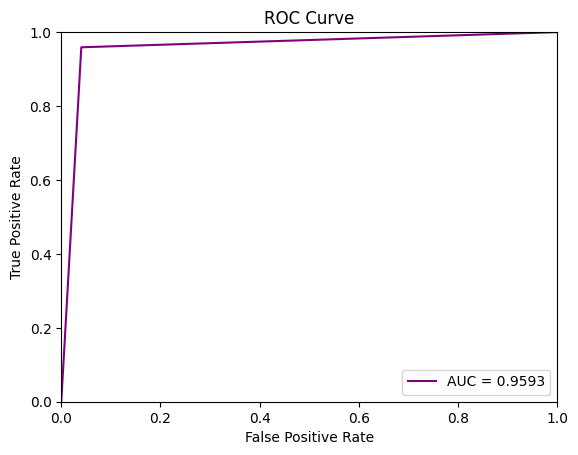

In [549]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(test_y, pred_xgb_y1)
auc = auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, color = 'purple', label = 'AUC = %0.4f' % auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()  

### MLP

In [550]:
from sklearn.neural_network import MLPClassifier

#建立模型
mlp_model = MLPClassifier()
mlp_model = mlp_model.fit(train_X, train_y)

#使用模型對測試集做預測
pred_mlp_y = mlp_model.predict(test_X)
# MLP
print('6-a\nMLP:\n\n使用之model：MLPClassifier ()，其參數設定為預設')
print()

# Accuracy,Precision,Recall,F1-score
print("Testing Accuracy :", '%.4f'%accuracy_score(test_y, pred_mlp_y))
print("Testing Precision :", '%.4f'%precision_score(test_y, pred_mlp_y))
print("Testing Recall :", '%.4f'%recall_score(test_y, pred_mlp_y))
print("Testing f1-score :", '%.4f'%f1_score(test_y, pred_mlp_y))
# ROC
print('Area under test roc :','%.4f'%roc_auc_score(test_y, pred_mlp_y))
# confusionmatrix
cm = confusion_matrix(test_y, pred_mlp_y)
print('condusion matrix:\n',cm)

6-a
MLP:

使用之model：MLPClassifier ()，其參數設定為預設

Testing Accuracy : 0.8734
Testing Precision : 0.7577
Testing Recall : 0.8821
Testing f1-score : 0.8152
Area under test roc : 0.8757
condusion matrix:
 [[366  55]
 [ 23 172]]


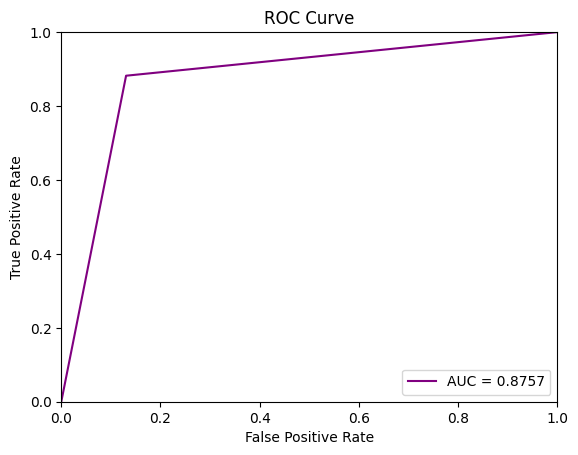

In [551]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(test_y, pred_mlp_y)
auc = auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, color = 'purple', label = 'AUC = %0.4f' % auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()  

In [552]:
#減少input屬性

#模型建構/訓練
mlp_model = MLPClassifier()
mlp_model.fit(train_im_X,train_im_y)

#使用模型對測試集做預測
pred_mlp_y_im = mlp_model.predict(test_im_X)

print('6-b\nMLP:\n\n使用之model：MLPClassifier ()，其參數設定為預設')
print('input之屬性僅選取原資料集中的16個（詳見先前說明）')
print()
# Accuracy,Precision,Recall,F1-score
print("Testing Accuracy :", '%.4f'%accuracy_score(test_im_y, pred_mlp_y_im))
print("Testing Precision :", '%.4f'%precision_score(test_im_y, pred_mlp_y_im))
print("Testing Recall :", '%.4f'%recall_score(test_im_y, pred_mlp_y_im))
print("Testing f1-score :", '%.4f'%f1_score(test_im_y, pred_mlp_y_im))
# ROC
print('Area under test roc :','%.4f'%roc_auc_score(test_im_y, pred_mlp_y_im))
# confusionmatrix
cm = confusion_matrix(test_im_y, pred_mlp_y_im)
print('condusion matrix:\n',cm)

6-b
MLP:

使用之model：MLPClassifier ()，其參數設定為預設
input之屬性僅選取原資料集中的16個（詳見先前說明）

Testing Accuracy : 0.8344
Testing Precision : 0.7657
Testing Recall : 0.6872
Testing f1-score : 0.7243
Area under test roc : 0.7949
condusion matrix:
 [[380  41]
 [ 61 134]]


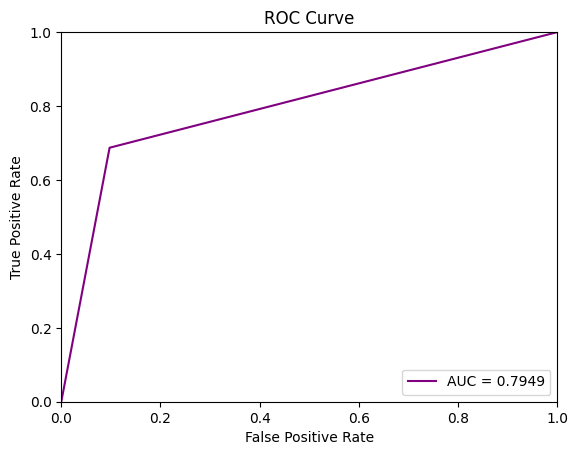

In [553]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(test_im_y, pred_mlp_y_im)
auc = auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, color = 'purple', label = 'AUC = %0.4f' % auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()  

In [554]:
#調整超參數

#建立模型
mlp_model = MLPClassifier(max_iter=5000,
                          hidden_layer_sizes=40,
                          solver='lbfgs')        #預設參數：hidden_layer_sizes=100, activation='relu', max_iter=200, solver='adam', alpha=0.0001, batch_size='auto', learning_rate 
mlp_model = mlp_model.fit(train_X, train_y)

#使用模型對測試集做預測
pred_mlp_y1 = mlp_model.predict(test_X)
# MLP
print('6-c\nMLP:\n\n使用之model：MLPClassifier(max_iter=5000, hidden_layer_sizes=40, solver=\'lbfgs\')，其參數設定有做調整而非預設')
print()

# Accuracy,Precision,Recall,F1-score
print("Testing Accuracy :", '%.4f'%accuracy_score(test_y, pred_mlp_y1))
print("Testing Precision :", '%.4f'%precision_score(test_y, pred_mlp_y1))
print("Testing Recall :", '%.4f'%recall_score(test_y, pred_mlp_y1))
print("Testing f1-score :", '%.4f'%f1_score(test_y, pred_mlp_y1))
# ROC
print('Area under test roc :','%.4f'%roc_auc_score(test_y, pred_mlp_y1))
# confusionmatrix
cm = confusion_matrix(test_y, pred_mlp_y1)
print('condusion matrix:\n',cm)

6-c
MLP:

使用之model：MLPClassifier(max_iter=5000, hidden_layer_sizes=40, solver='lbfgs')，其參數設定有做調整而非預設

Testing Accuracy : 0.8555
Testing Precision : 0.7978
Testing Recall : 0.7282
Testing f1-score : 0.7614
Area under test roc : 0.8213
condusion matrix:
 [[385  36]
 [ 53 142]]


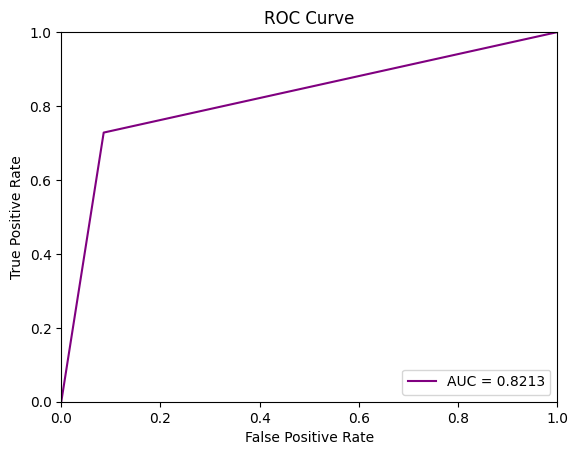

In [555]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(test_y, pred_mlp_y1)
auc = auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, color = 'purple', label = 'AUC = %0.4f' % auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()  

### SVM

In [556]:
#載入套件
from sklearn.svm import SVC

#模型建構/訓練
model_svm = SVC(kernel='linear')
model_svm = model_svm.fit(train_X,train_y)

#使用模型對測試集做預測
pred_svm_y = model_svm.predict(test_X)
# SVM
print('7-a\nSVM:\n\n使用之model：SVC(kernel=\'linear\')，其參數設定除了kernel=\'linear\'其餘為預設')
print()

# Accuracy,Precision,Recall,F1-score
print("Testing Accuracy :", '%.4f'%accuracy_score(test_y, pred_svm_y))
print("Testing Precision :", '%.4f'%precision_score(test_y, pred_svm_y))
print("Testing Recall :", '%.4f'%recall_score(test_y, pred_svm_y))
print("Testing f1-score :", '%.4f'%f1_score(test_y, pred_svm_y))
# ROC
print('Area under test roc :','%.4f'%roc_auc_score(test_y, pred_svm_y))
# confusionmatrix
cm = confusion_matrix(test_y, pred_svm_y)
print('condusion matrix:\n',cm)

7-a
SVM:

使用之model：SVC(kernel='linear')，其參數設定除了kernel='linear'其餘為預設

Testing Accuracy : 0.8393
Testing Precision : 0.7759
Testing Recall : 0.6923
Testing f1-score : 0.7317
Area under test roc : 0.7998
condusion matrix:
 [[382  39]
 [ 60 135]]


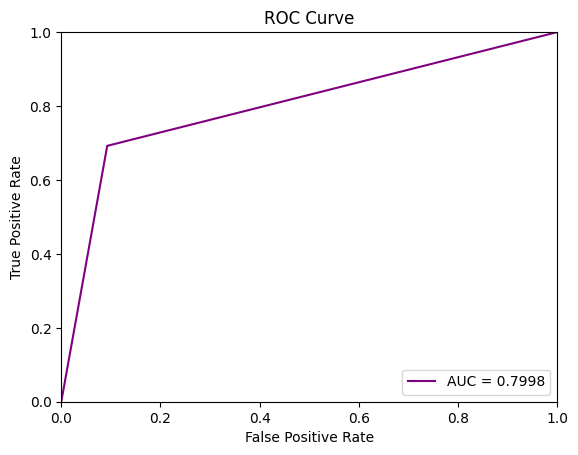

In [557]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(test_y, pred_svm_y)
auc = auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, color = 'purple', label = 'AUC = %0.4f' % auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

In [558]:
#減少input屬性

#模型建構/訓練
model_svm = SVC(kernel='linear')
model_svm.fit(train_im_X,train_im_y)

#使用模型對測試集做預測
pred_svm_y_im = model_svm.predict(test_im_X)

print('7-b\nSVM:\n\n使用之model：SVC(kernel=\'linear\')，其參數設定除了kernel=\'linear\'其餘為預設')
print('input之屬性僅選取原資料集中的16個（詳見先前說明）')
print()
# Accuracy,Precision,Recall,F1-score
print("Testing Accuracy :", '%.4f'%accuracy_score(test_im_y, pred_svm_y_im))
print("Testing Precision :", '%.4f'%precision_score(test_im_y, pred_svm_y_im))
print("Testing Recall :", '%.4f'%recall_score(test_im_y, pred_svm_y_im))
print("Testing f1-score :", '%.4f'%f1_score(test_im_y, pred_svm_y_im))
# ROC
print('Area under test roc :','%.4f'%roc_auc_score(test_im_y, pred_svm_y_im))
# confusionmatrix
cm = confusion_matrix(test_im_y, pred_svm_y_im)
print('condusion matrix:\n',cm)

7-b
SVM:

使用之model：SVC(kernel='linear')，其參數設定除了kernel='linear'其餘為預設
input之屬性僅選取原資料集中的16個（詳見先前說明）

Testing Accuracy : 0.8166
Testing Precision : 0.7384
Testing Recall : 0.6513
Testing f1-score : 0.6921
Area under test roc : 0.7722
condusion matrix:
 [[376  45]
 [ 68 127]]


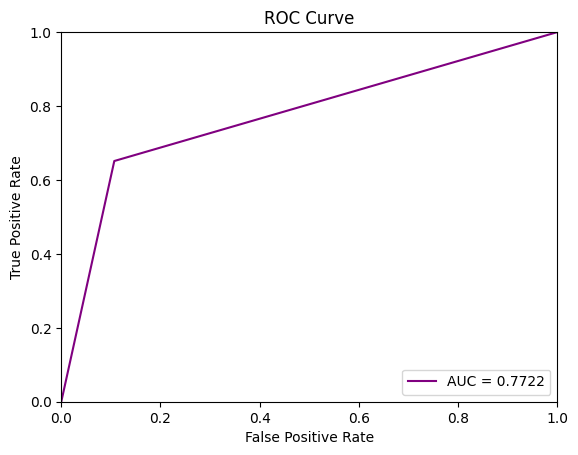

In [559]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(test_im_y, pred_svm_y_im)
auc = auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, color = 'purple', label = 'AUC = %0.4f' % auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

In [560]:
#調整超參數

#模型建構/訓練
model_svm = SVC(kernel='sigmoid',
                coef0=2.2
                )
model_svm = model_svm.fit(train_X,train_y)

#使用模型對測試集做預測
pred_svm_y1 = model_svm.predict(test_X)
# SVM
print('7-c\nSVM:\n\n使用之model：SVC(kernel=\'sigmoid\', coef0=2.2)，其參數設定除了kernel=\'linear\'其參數設定有做調整非預設')
print()

# Accuracy,Precision,Recall,F1-score
print("Testing Accuracy :", '%.4f'%accuracy_score(test_y, pred_svm_y1))
print("Testing Precision :", '%.4f'%precision_score(test_y, pred_svm_y1))
print("Testing Recall :", '%.4f'%recall_score(test_y, pred_svm_y1))
print("Testing f1-score :", '%.4f'%f1_score(test_y, pred_svm_y1))
# ROC
print('Area under test roc :','%.4f'%roc_auc_score(test_y, pred_svm_y1))
# confusionmatrix
cm = confusion_matrix(test_y, pred_svm_y1)
print('condusion matrix:\n',cm)

7-c
SVM:

使用之model：SVC(kernel='sigmoid', coef0=2.2)，其參數設定除了kernel='linear'其參數設定有做調整非預設

Testing Accuracy : 0.6721
Testing Precision : 0.1818
Testing Recall : 0.0103
Testing f1-score : 0.0194
Area under test roc : 0.4944
condusion matrix:
 [[412   9]
 [193   2]]


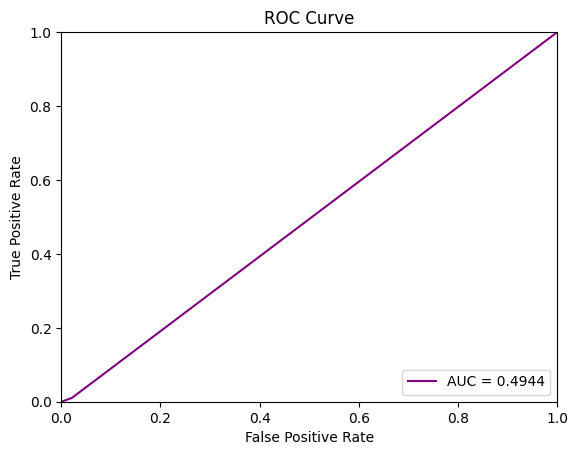

In [561]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(test_y, pred_svm_y1)
auc = auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, color = 'purple', label = 'AUC = %0.4f' % auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

### CNN

In [562]:
from keras.models import Sequential
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.layers.core import Dense,Dropout,Activation,Flatten
from tensorflow.keras.layers import Embedding



# 建立模型
modelCNN = Sequential()
modelCNN.add(Embedding(output_dim=32, input_dim=340, input_length=34))
# 隨機在神經網路中放棄20%的神經元，避免overfitting
dropout_percent = 0.5
modelCNN.add(Dropout(dropout_percent))

# 建立卷積層1(Convolution1)
modelCNN.add(Conv1D(filters=64,padding='same', activation='relu', kernel_size=3))
modelCNN .add(Dropout(dropout_percent))

# 建立池化層1(Pooling1)
modelCNN.add(MaxPooling1D(pool_size=2))


# 建立卷積層2(Convolution2)
modelCNN.add(Conv1D(filters=128,padding='valid', activation='relu', kernel_size=4))
modelCNN .add(Dropout(dropout_percent))

# 建立池化層2(Pooling2)
modelCNN.add(MaxPooling1D(pool_size=3))


# 建立平坦層
modelCNN.add(Flatten())
modelCNN.add(Dropout(dropout_percent))

# 建立隱藏層 (250個神經元)
modelCNN.add(Dense(250, activation='relu'))
modelCNN.add(Dropout(dropout_percent))

# 建立輸出層 (1個神經元)
modelCNN.add(Dense(1, activation='sigmoid'))

# 查看模型摘要
modelCNN.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 34, 32)            10880     
                                                                 
 dropout_60 (Dropout)        (None, 34, 32)            0         
                                                                 
 conv1d_24 (Conv1D)          (None, 34, 64)            6208      
                                                                 
 dropout_61 (Dropout)        (None, 34, 64)            0         
                                                                 
 max_pooling1d_24 (MaxPoolin  (None, 17, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_25 (Conv1D)          (None, 14, 128)           32896     
                                                     

In [563]:
import matplotlib.pyplot as plt

def show_train_history(train, val,y_label,title):
    plt.figure()
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[val])
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel(y_label)
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

Epoch 1/50


/home/iebi/.local/lib/python3.8/site-packages/keras/engine/data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


18/18 [==============================] - 1s 20ms/step - loss: 0.6299 - accuracy: 0.6858 - f1_m: 0.0227 - precision_m: 0.0320 - recall_m: 0.0248 - val_loss: 0.6475 - val_accuracy: 0.7004 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/50
18/18 [==============================] - 0s 10ms/step - loss: 0.6192 - accuracy: 0.6935 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.6479 - val_accuracy: 0.7004 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/50
18/18 [==============================] - 0s 10ms/step - loss: 0.6180 - accuracy: 0.6935 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.6455 - val_accuracy: 0.7004 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/50
18/18 [==============================] - 0s 10ms/step - loss: 0.6177 - accuracy: 0.6935 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 

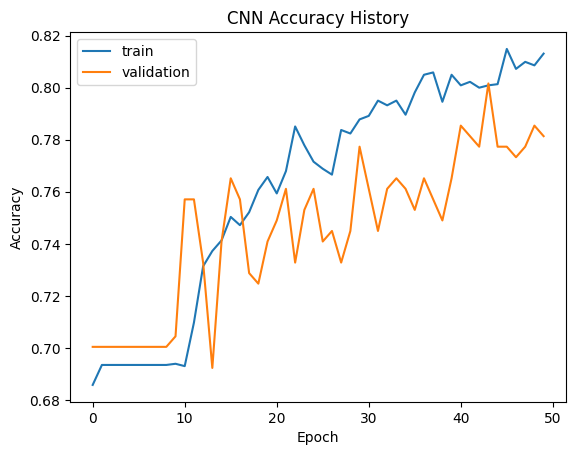

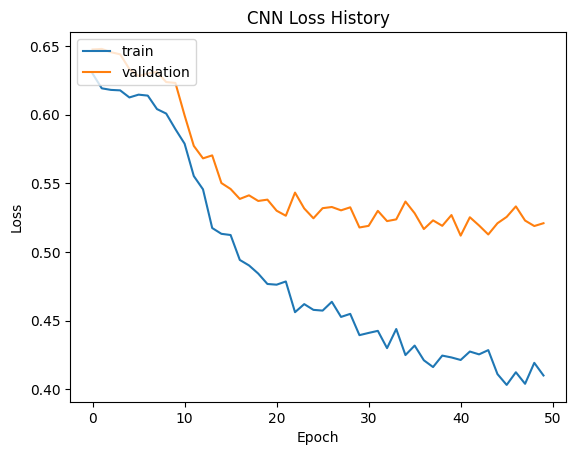

In [564]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + 
    K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# 定義訓練模型
modelCNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy",f1_m,precision_m, recall_m])



# 模型訓練
train_history = modelCNN.fit(train_X,train_y,
         epochs=50, 
         batch_size=128,
         verbose=1,
         validation_split=0.1)


# 準確率
loss, accuracy, f1_score, precision, recall = modelCNN.evaluate(test_X,test_y, verbose=1)
# 畫出accuracy圖
show_train_history('accuracy', 'val_accuracy', "Accuracy", "CNN Accuracy History")
show_train_history('loss', 'val_loss', "Loss", "CNN Loss History")



In [565]:
print('CNN: ')
print()

# Accuracy,Precision,Recall,F1-score
print("Testing Accuracy :",'%.4f'%accuracy)
print("Testing Precision :", '%.4f'%precision)
print("Testing Recall :",'%.4f'%recall)
print("Testing f1-score :", '%.4f'%f1_score)
print()


CNN: 

Testing Accuracy : 0.7451
Testing Precision : 0.5981
Testing Recall : 0.4840
Testing f1-score : 0.5296



20/20 [==============================] - 0s 1ms/step


/tmp/ipykernel_3422409/3022381959.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred_keras = modelCNN.predict_generator(test_X,  verbose=1)


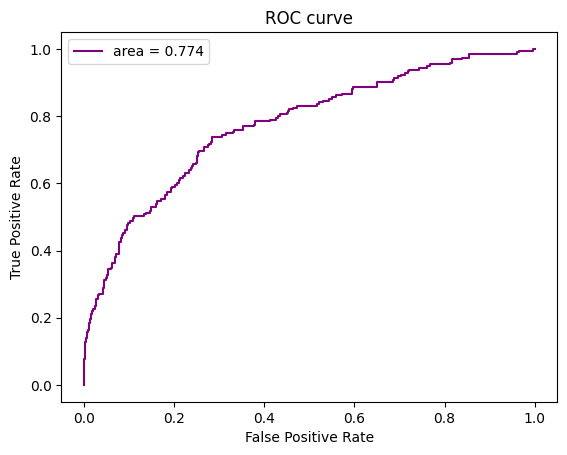

0.7738839149765516

In [566]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# make a prediction
y_pred_keras = modelCNN.predict_generator(test_X,  verbose=1)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_y, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)

plt.plot(fpr_keras, tpr_keras,color ='purple',
         label='area = {:.3f}'.format(auc_keras))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
auc_keras

In [567]:
from sklearn.metrics import confusion_matrix
y_pred_keras=modelCNN.predict(test_X)
y_pred_list=[]
for i in y_pred_keras:
    if i>0.5:
        y_pred_list.append(1)
    if i<0.5 :
        y_pred_list.append(0)
y_pred_list
cm=confusion_matrix(test_y, y_pred_list)
print('condusion matrix:\n',cm)

20/20 [==============================] - 0s 1ms/step
condusion matrix:
 [[359  62]
 [ 95 100]]
